<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import requests
from bs4 import BeautifulSoup
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Most Used Online Purchase Channels for Beauty Products Worldwide (2023)
### Published by L. Yltävä, May 31, 2024

A 2023 survey asked consumers about their spending on beauty products across various purchase channels. Results showed:

**Top online marketplaces: 27%**

Retailer websites: 13%

Brand websites: 9%

Online sales of beauty products heavily depend on consumers' digital shopping behavior. In 2023, the majority of consumers preferred using leading marketplaces such as **Amazon** for their beauty purchases. This trend is influenced by Amazon's high visibility in search engine results for beauty brands. Amazon ranks second after Alibaba as the world's leading health, beauty, and personal care online retailer by sales. Amazon's sales of health, beauty, and personal care products are projected to nearly double from approximately 44 billion dollars in 2022 to 79.4 billion by 2027.

# Revenue of Beauty Care E-Commerce in Selected Countries Worldwide (2023)
### Published by L. Yltävä, March 26, 2024

The top countries by revenue in the 'Beauty Care' segment of the e-commerce market in 2023 were:

**United States: $10.98 billion**

China: $10.54 billion

Japan: $2.66 billion

Germany: $1.94 billion


# Share of Consumers Who Complete Beauty Purchases Online in the U.S. (2023), by Channel
### Published by L. Yltävä, July 25, 2023

A 2023 survey found that:

**Nearly 25% of U.S. consumers purchased beauty products on Amazon**.

Around 23% of consumers bought beauty products on Walmart.

Beauty retailers' websites or apps were used by 14% of survey respondents.


# Distribution of Best-Selling Beauty & Personal Care Products on Amazon (2024)
### Published by Statista Research Department, May 15, 2024

Data from the first quarter of 2024 revealed that the top 25 beauty and personal care products sold on Amazon were:

**Skincare items: 36%**

Tools and accessories: 20%

Body and make-up products: 16%

# Getting Amazon Data from API

In [ ]:
url = "https://real-time-amazon-data.p.rapidapi.com/search"

country = "US"
query = "Skin Care"
total_pages = 200  # For example, retrieving 200 pages

products = []

for page in range(95, total_pages + 1):
    querystring = {"query": query, "page": str(page), "country": country}

    headers = {
        "X-RapidAPI-Key": "0680d04c7cmshbe4c6751467af3dp13f5b0jsn85ae54c71434",
        "X-RapidAPI-Host": "real-time-amazon-data.p.rapidapi.com"
    }

    response = requests.get(url, headers=headers, params=querystring)

    if response.status_code == 200:
        products_on_page = response.json().get('data', {}).get('products', [])
        products.extend(products_on_page)
    else:
        print(f"Failed to fetch page {page}: {response.text}")

In [ ]:
# Convert the list of dictionaries into a DataFrame
df_amazon = pd.DataFrame(products)

# Display the DataFrame
df_amazon.head()

asin                                      product_title  \
0  B0BLGMDMFL  Calcium Bentonite Clay Face Mask, Hydrating Mo...   
1  B0BLNJNX25  Wrinkle fit Korean Mesh Sheet Masks for Neck (...   
2  B00HNYES2C  Food Grade Organic Calcium Bentonite Clay Powd...   
3  B0CNHTST52  Mask LED Light Therapy Skin Care Face Mask wit...   
4  B0CSQ86P26  Nutrafol Clear Skin Acne Supplement for Women,...   

  product_price unit_price  unit_count product_original_price currency  \
0        $10.99      $1.37           8                 $11.99      USD   
1        $15.90      $2.27           7                   None      USD   
2        $17.99      $1.24          15                   None      USD   
3       $599.00    $599.00           1                   None      USD   
4        $88.00      $0.73         121                   None      USD   

  product_star_rating  product_num_ratings  \
0                 4.3                   18   
1                   4                  151   
2                 4.6                 1090   
3                 4.3                   11   
4                 4.1                   68   

                            product_url  \
0  https://www.amazon.com/dp/B0BLGMDMFL   
1  https://www.amazon.com/dp/B0BLNJNX25   
2  https://www.amazon.com/dp/B00HNYES2C   
3  https://www.amazon.com/dp/B0CNHTST52   
4  https://www.amazon.com/dp/B0CSQ86P26   

                                       product_photo  product_num_offers  \
0  https://m.media-amazon.com/images/I/71MX2VAQsn...                   1   
1  https://m.media-amazon.com/images/I/61x1bz6nNz...                   1   
2  https://m.media-amazon.com/images/I/71VlTgevG4...                   1   
3  https://m.media-amazon.com/images/I/61DUBrlOO3...                   1   
4  https://m.media-amazon.com/images/I/51wkw743mZ...                   1   

  product_minimum_offer_price  is_best_seller  is_amazon_choice  is_prime  \
0                      $10.99           False             False      True   
1                      $15.90           False             False      True   
2                      $17.99           False             False      True   
3                     $599.00           False             False      True   
4                      $88.00           False             False      True   

   climate_pledge_friendly               sales_volume  \
0                     True                       None   
1                    False  500+ bought in past month   
2                     True  600+ bought in past month   
3                    False  100+ bought in past month   
4                    False   50+ bought in past month   

                                            delivery  
0  FREE delivery Mon, Jun 10 on $35 of items ship...  
1  FREE delivery Mon, Jun 10 on $35 of items ship...  
2  FREE delivery Mon, Jun 10 on $35 of items ship...  
3  FREE delivery Mon, Jun 10 Or fastest delivery ...  
4  FREE delivery Mon, Jun 10 Or fastest delivery ...

In [ ]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   asin                         9 non-null      object
 1   product_title                9 non-null      object
 2   product_price                9 non-null      object
 3   unit_price                   9 non-null      object
 4   unit_count                   9 non-null      int64 
 5   product_original_price       1 non-null      object
 6   currency                     9 non-null      object
 7   product_star_rating          8 non-null      object
 8   product_num_ratings          9 non-null      int64 
 9   product_url                  9 non-null      object
 10  product_photo                9 non-null      object
 11  product_num_offers           9 non-null      int64 
 12  product_minimum_offer_price  9 non-null      object
 13  is_best_seller               9 non-null

# Preparing of the Amazon Data

1. Drop some almost empty or unnessary columns ("coupon_text", "product_original_price", "product_photo", "currency", "product_num_offers", "is_amazon_choice")

2. Drop duplicates

3. Drop rows with any empty cells

4. Removing the '$' sign and converting prices to float-

5. Rename the column

6. Remove the 'K+ bought in past month' from the values and convert them to numeric format

7. Remove the phrase '+ bought in past month' from the values and convert them to numeric format





In [ ]:
# Dropping the specified columns
df_amazon = df_amazon.drop(columns=["coupon_text", "product_original_price", "product_photo", "currency", "product_num_offers", "is_amazon_choice"])

In [ ]:
# Drop duplicate rows
df_amazon = df_amazon.drop_duplicates()

In [ ]:
# Drop rows with any empty cells
df_amazon = df_amazon.dropna()

In [ ]:
# Removing the '$' sign and converting to float
df_amazon['product_price'] = df_amazon['product_price'].str.replace('$', '').astype(float)
df_amazon['unit_price'] = df_amazon['unit_price'].str.replace('$', '').astype(float)
df_amazon['product_minimum_offer_price'] = df_amazon['product_minimum_offer_price'].str.replace('$', '').astype(float)

# Display the updated DataFrame
df_amazon

In [ ]:
# Rename the column
df_amazon.rename(columns={'sales_volume': 'sales_volume_in_past_month'}, inplace=True)

# Remove the 'K+ bought in past month' from the values and convert them to numeric format
df_amazon['sales_volume_in_past_month'] = df_amazon['sales_volume_in_past_month'].str.replace('K+ bought in past month', '000')

In [ ]:
# Remove the '+ bought in past month' from the values and convert them to numeric format
df_amazon['sales_volume_in_past_month'] = df_amazon['sales_volume_in_past_month'].str.replace('+ bought in past month', '').astype(int)

In [ ]:
# Convert 'product_star_rating' to float
df_amazon['product_star_rating'] = df_amazon['product_star_rating'].astype(float)

In [ ]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 1 to 7
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   asin                         7 non-null      object 
 1   product_title                7 non-null      object 
 2   product_price                7 non-null      float64
 3   unit_price                   7 non-null      float64
 4   unit_count                   7 non-null      int64  
 5   product_star_rating          7 non-null      float64
 6   product_num_ratings          7 non-null      int64  
 7   product_url                  7 non-null      object 
 8   product_minimum_offer_price  7 non-null      float64
 9   is_best_seller               7 non-null      bool   
 10  is_prime                     7 non-null      bool   
 11  climate_pledge_friendly      7 non-null      bool   
 12  sales_volume_in_past_month   7 non-null      int64  
 13  delivery                     

"Climate Pledge Friendly" is a designation used by Amazon to identify products that meet certain sustainability criteria. Products with the "Climate Pledge Friendly" label have been verified by Amazon to meet one or more of the following sustainability certifications or initiatives:

Climate Pledge Friendly certification: Products certified under the Climate Pledge Friendly program meet Amazon’s sustainability standards, which focus on reducing carbon emissions and promoting sustainability throughout the product lifecycle.

In [ ]:
# Save the DataFrame to an Excel file
df_amazon.to_excel("df_amazon_8.xlsx", index=False)

print(f"DataFrame has been successfully saved to df_amazon_8.xlsx")

DataFrame has been successfully saved to df_amazon_8.xlsx


# Combining a pair of Data (to get bigger amount of rows, using one method - API)

In [ ]:
# Read the Excel file into a DataFrame
df_amazon_dropped = pd.read_excel("df_amazon_v2.xlsx")

In [ ]:
df_amazon_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   asin                         323 non-null    object 
 1   product_title                323 non-null    object 
 2   product_price                323 non-null    float64
 3   unit_price                   323 non-null    float64
 4   unit_count                   323 non-null    int64  
 5   product_star_rating          323 non-null    float64
 6   product_num_ratings          323 non-null    int64  
 7   product_url                  323 non-null    object 
 8   product_minimum_offer_price  323 non-null    float64
 9   is_best_seller               323 non-null    bool   
 10  is_prime                     323 non-null    bool   
 11  climate_pledge_friendly      323 non-null    bool   
 12  sales_volume_in_past_month   323 non-null    int64  
 13  delivery            

In [ ]:
# Read the Excel file into a DataFrame
df_amazon_dropped_8 = pd.read_excel("df_amazon_8.xlsx")

In [ ]:
# # Concatenate the two DataFrames
combined_df = pd.concat([df_amazon_dropped, df_amazon_dropped_8], ignore_index=True)

In [ ]:
df_amazon_dropped = combined_df.copy()
df_amazon_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   asin                         330 non-null    object 
 1   product_title                330 non-null    object 
 2   product_price                330 non-null    float64
 3   unit_price                   330 non-null    float64
 4   unit_count                   330 non-null    int64  
 5   product_star_rating          330 non-null    float64
 6   product_num_ratings          330 non-null    int64  
 7   product_url                  330 non-null    object 
 8   product_minimum_offer_price  330 non-null    float64
 9   is_best_seller               330 non-null    bool   
 10  is_prime                     330 non-null    bool   
 11  climate_pledge_friendly      330 non-null    bool   
 12  sales_volume_in_past_month   330 non-null    int64  
 13  delivery            

In [ ]:
# Drop duplicates
df_amazon_dropped = df_amazon_dropped.drop_duplicates()
df_amazon_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 329 entries, 0 to 329
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   asin                         329 non-null    object 
 1   product_title                329 non-null    object 
 2   product_price                329 non-null    float64
 3   unit_price                   329 non-null    float64
 4   unit_count                   329 non-null    int64  
 5   product_star_rating          329 non-null    float64
 6   product_num_ratings          329 non-null    int64  
 7   product_url                  329 non-null    object 
 8   product_minimum_offer_price  329 non-null    float64
 9   is_best_seller               329 non-null    bool   
 10  is_prime                     329 non-null    bool   
 11  climate_pledge_friendly      329 non-null    bool   
 12  sales_volume_in_past_month   329 non-null    int64  
 13  delivery                 

In [ ]:
# Drop duplicates based on the 'product_title' column, keeping only the first occurrence
df_amazon_dropped = df_amazon_dropped.drop_duplicates(subset='asin', keep='first')

In [ ]:
df_amazon_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 329
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   asin                         324 non-null    object 
 1   product_title                324 non-null    object 
 2   product_price                324 non-null    float64
 3   unit_price                   324 non-null    float64
 4   unit_count                   324 non-null    int64  
 5   product_star_rating          324 non-null    float64
 6   product_num_ratings          324 non-null    int64  
 7   product_url                  324 non-null    object 
 8   product_minimum_offer_price  324 non-null    float64
 9   is_best_seller               324 non-null    bool   
 10  is_prime                     324 non-null    bool   
 11  climate_pledge_friendly      324 non-null    bool   
 12  sales_volume_in_past_month   324 non-null    int64  
 13  delivery                 

In [ ]:
# Count the number of best sellers
num_best_sellers = df_amazon_dropped['is_best_seller'].value_counts()[True]

print("Number of best sellers:", num_best_sellers)

Number of best sellers: 19


In [ ]:
# Write the cleaned DataFrame to a new Excel file
df_amazon_dropped.to_excel('df_amazon_v3.xlsx', index=False)

# Statistics
1) Computing Summary Statistics

2) Visualizing Distributions

3) Computing Correlation Matrix

4) Plotting Heatmap

5) T-test

In [ ]:
df_amazon_dropped =  pd.read_excel("df_amazon_v3.xlsx")

In [ ]:
from scipy import stats

# Compute mean, median, standard deviation, and variance for numerical columns
mean_product_price = df_amazon_dropped['product_price'].mean()
median_product_price = df_amazon_dropped['product_price'].median()
std_product_price = df_amazon_dropped['product_price'].std()
var_product_price = stats.tvar(df_amazon_dropped['product_price'])

mean_unit_price = df_amazon_dropped['unit_price'].mean()
median_unit_price = df_amazon_dropped['unit_price'].median()
std_unit_price = df_amazon_dropped['unit_price'].std()
var_unit_price = stats.tvar(df_amazon_dropped['unit_price'])

mean_product_star_rating = df_amazon_dropped['product_star_rating'].mean()
median_product_star_rating = df_amazon_dropped['product_star_rating'].median()
std_product_star_rating = df_amazon_dropped['product_star_rating'].std()
var_product_star_rating = stats.tvar(df_amazon_dropped['product_star_rating'])

mean_product_num_ratings = df_amazon_dropped['product_num_ratings'].mean()
median_product_num_ratings = df_amazon_dropped['product_num_ratings'].median()
std_product_num_ratings = df_amazon_dropped['product_num_ratings'].std()
var_product_num_ratings = stats.tvar(df_amazon_dropped['product_num_ratings'])

mean_sales_volume = df_amazon_dropped['sales_volume_in_past_month'].mean()
median_sales_volume = df_amazon_dropped['sales_volume_in_past_month'].median()
std_sales_volume = df_amazon_dropped['sales_volume_in_past_month'].std()
var_sales_volume = stats.tvar(df_amazon_dropped['sales_volume_in_past_month'])

# Display computed statistics
print("Product Price:")
print("Mean:", mean_product_price)
print("Median:", median_product_price)
print("Standard Deviation:", std_product_price)
print("Variance:", var_product_price)
print("\nUnit Price:")
print("Mean:", mean_unit_price)
print("Median:", median_unit_price)
print("Standard Deviation:", std_unit_price)
print("Variance:", var_unit_price)
print("\nProduct Star Rating:")
print("Mean:", mean_product_star_rating)
print("Median:", median_product_star_rating)
print("Standard Deviation:", std_product_star_rating)
print("Variance:", var_product_star_rating)
print("\nProduct Number of Ratings:")
print("Mean:", mean_product_num_ratings)
print("Median:", median_product_num_ratings)
print("Standard Deviation:", std_product_num_ratings)
print("Variance:", var_product_num_ratings)
print("\nSales Volume in Past Month:")
print("Mean:", mean_sales_volume)
print("Median:", median_sales_volume)
print("Standard Deviation:", std_sales_volume)
print("Variance:", var_sales_volume)

Product Price:
Mean: 27.94472222222222
Median: 19.29
Standard Deviation: 39.166292897125274
Variance: 1533.9984993034054

Unit Price:
Mean: 23.456203703703704
Median: 7.925000000000001
Standard Deviation: 70.3289224781434
Variance: 4946.157336936703

Product Star Rating:
Mean: 4.444753086419753
Median: 4.5
Standard Deviation: 0.2682420712975016
Variance: 0.07195380881397392

Product Number of Ratings:
Mean: 10635.364197530864
Median: 1453.0
Standard Deviation: 24164.70798493084
Variance: 583933111.9969803

Sales Volume in Past Month:
Mean: 7108.641975308642
Median: 1000.0
Standard Deviation: 16176.058332162973
Variance: 261664863.16553915


In [ ]:
# Compute skewness for numerical columns
skew_product_price = stats.skew(df_amazon_dropped['product_price'])
skew_unit_price = stats.skew(df_amazon_dropped['unit_price'])
skew_product_star_rating = stats.skew(df_amazon_dropped['product_star_rating'])
skew_product_num_ratings = stats.skew(df_amazon_dropped['product_num_ratings'])
skew_sales_volume = stats.skew(df_amazon_dropped['sales_volume_in_past_month'])

# Compute kurtosis for numerical columns
kurtosis_product_price = stats.kurtosis(df_amazon_dropped['product_price'])
kurtosis_unit_price = stats.kurtosis(df_amazon_dropped['unit_price'])
kurtosis_product_star_rating = stats.kurtosis(df_amazon_dropped['product_star_rating'])
kurtosis_product_num_ratings = stats.kurtosis(df_amazon_dropped['product_num_ratings'])
kurtosis_sales_volume = stats.kurtosis(df_amazon_dropped['sales_volume_in_past_month'])

# Compute percentiles
percentiles_product_price = np.percentile(df_amazon_dropped['product_price'], [25, 50, 75])
percentiles_unit_price = np.percentile(df_amazon_dropped['unit_price'], [25, 50, 75])
percentiles_product_star_rating = np.percentile(df_amazon_dropped['product_star_rating'], [25, 50, 75])
percentiles_product_num_ratings = np.percentile(df_amazon_dropped['product_num_ratings'], [25, 50, 75])
percentiles_sales_volume = np.percentile(df_amazon_dropped['sales_volume_in_past_month'], [25, 50, 75])

# Compute correlation matrix for selected numerical columns
numerical_columns = ['product_price', 'unit_price', 'product_star_rating', 'product_num_ratings', 'sales_volume_in_past_month']
correlation_matrix = df_amazon_dropped[numerical_columns].corr()

# Display computed statistics
print("Skewness:")
print("Product Price:", skew_product_price)
print("Unit Price:", skew_unit_price)
print("Product Star Rating:", skew_product_star_rating)
print("Product Number of Ratings:", skew_product_num_ratings)
print("Sales Volume in Past Month:", skew_sales_volume)

print("\nKurtosis:")
print("Product Price:", kurtosis_product_price)
print("Unit Price:", kurtosis_unit_price)
print("Product Star Rating:", kurtosis_product_star_rating)
print("Product Number of Ratings:", kurtosis_product_num_ratings)
print("Sales Volume in Past Month:", kurtosis_sales_volume)

print("\nPercentiles:")
print("Product Price:", percentiles_product_price)
print("Unit Price:", percentiles_unit_price)
print("Product Star Rating:", percentiles_product_star_rating)
print("Product Number of Ratings:", percentiles_product_num_ratings)
print("Sales Volume in Past Month:", percentiles_sales_volume)

print("\nCorrelation Matrix:")
print(correlation_matrix)

Skewness:
Product Price: 10.221041236040376
Unit Price: 7.7637284386887835
Product Star Rating: -1.6268289441588706
Product Number of Ratings: 3.5460872845637974
Sales Volume in Past Month: 3.7226281645057946

Kurtosis:
Product Price: 139.58526321194455
Unit Price: 64.24802528208889
Product Star Rating: 5.947784973029437
Product Number of Ratings: 13.610377440515016
Sales Volume in Past Month: 15.38463529979014

Percentiles:
Product Price: [13.565  19.29   29.9925]
Unit Price: [ 2.5     7.925  22.5175]
Product Star Rating: [4.3 4.5 4.6]
Product Number of Ratings: [ 217. 1453. 6959.]
Sales Volume in Past Month: [ 200. 1000. 6000.]

Correlation Matrix:
                            product_price  unit_price  product_star_rating  \
product_price                    1.000000    0.498074            -0.009775   
unit_price                       0.498074    1.000000            -0.060679   
product_star_rating             -0.009775   -0.060679             1.000000   
product_num_ratings          

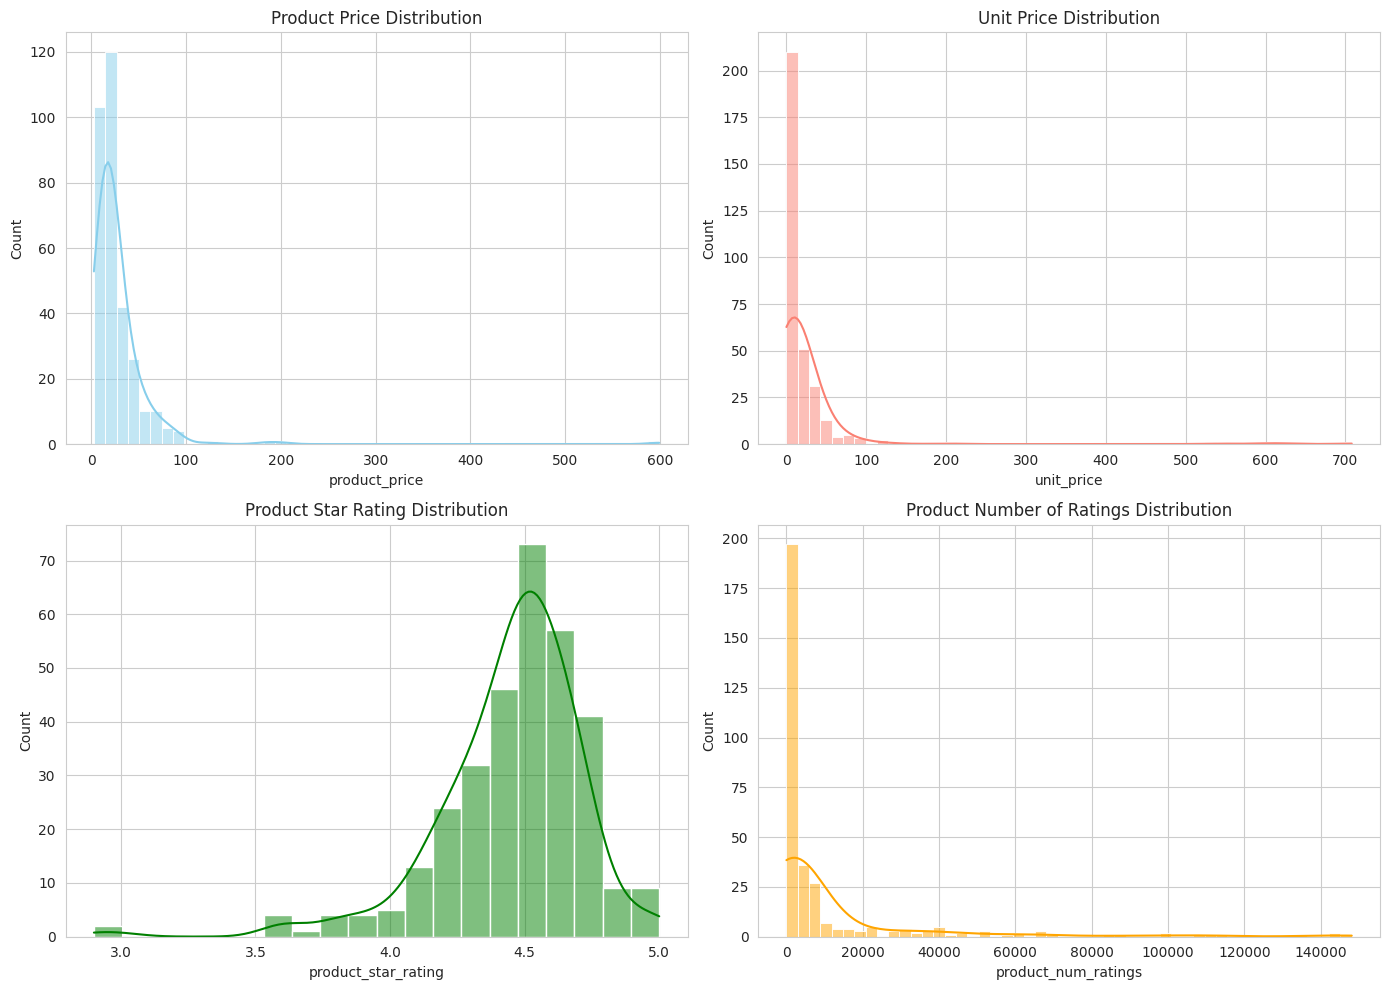

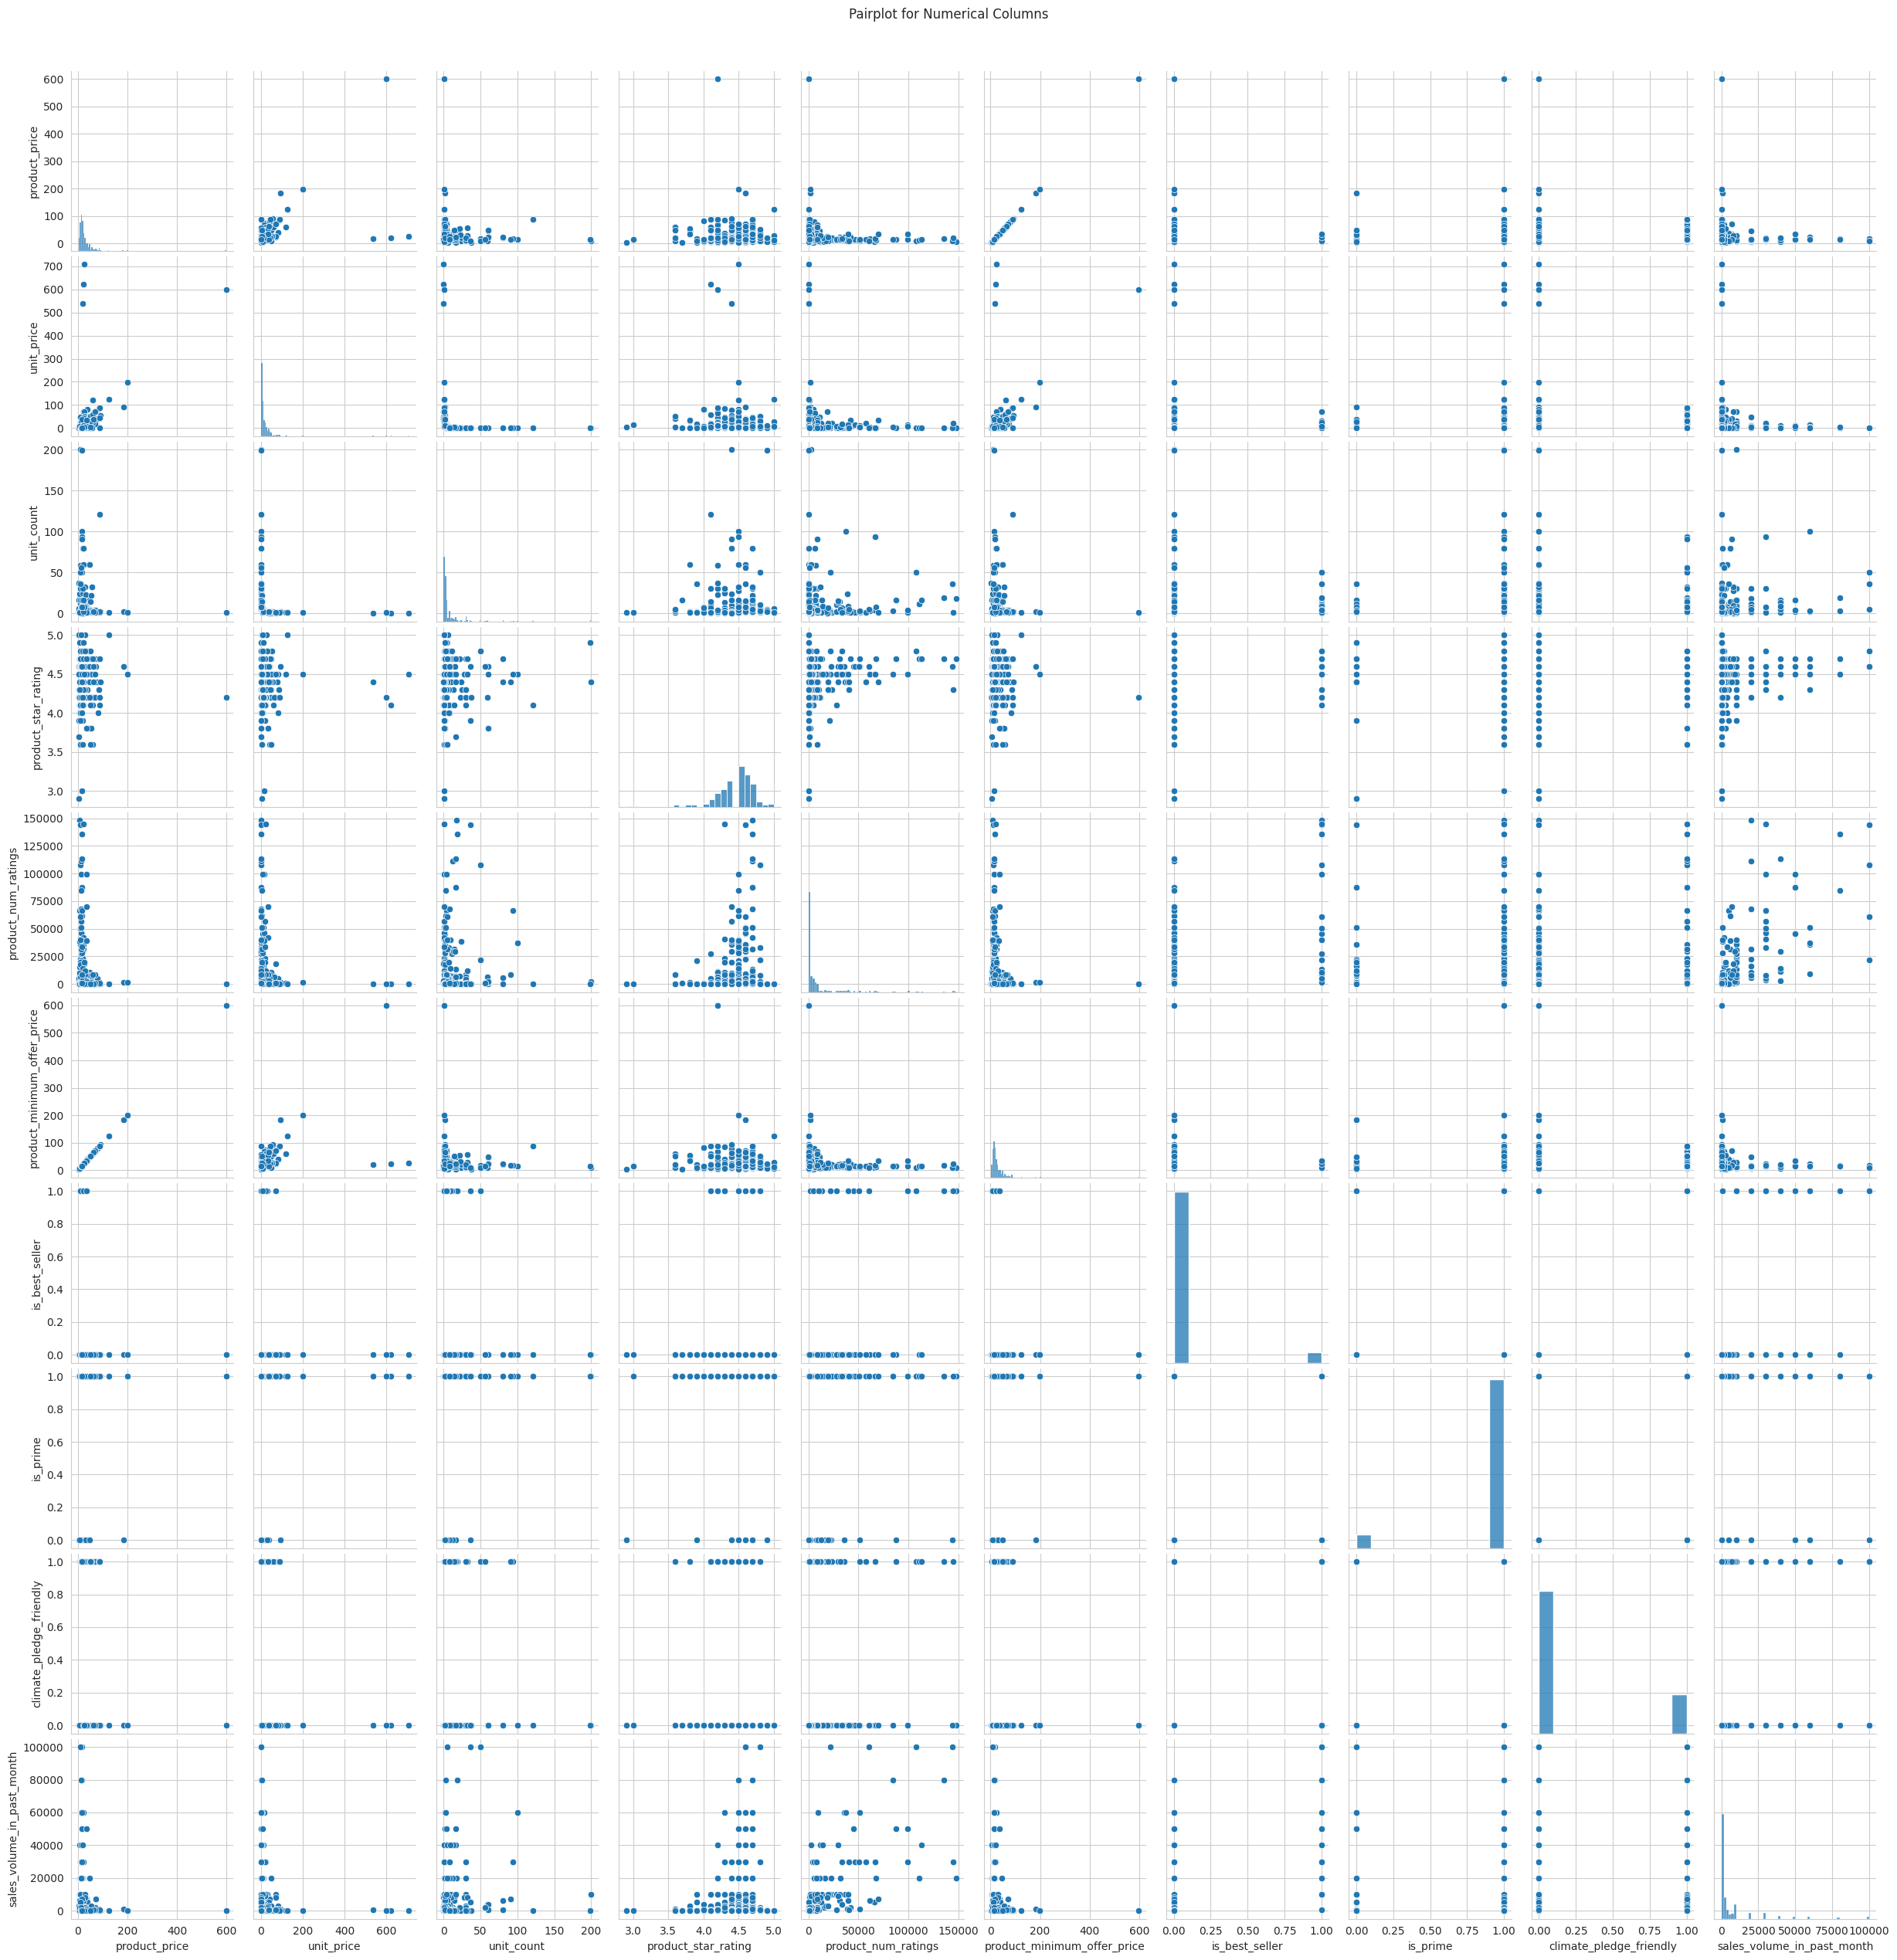

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style("whitegrid")

# Distribution plots for numerical columns
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(df_amazon_dropped['product_price'], bins=50, kde=True, color='skyblue')
plt.title('Product Price Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df_amazon_dropped['unit_price'], bins=50, kde=True, color='salmon')
plt.title('Unit Price Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df_amazon_dropped['product_star_rating'], bins=20, kde=True, color='green')
plt.title('Product Star Rating Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df_amazon_dropped['product_num_ratings'], bins=50, kde=True, color='orange')
plt.title('Product Number of Ratings Distribution')

plt.tight_layout()
plt.show()

# Pairplot for numerical columns
sns.pairplot(df_amazon_dropped[numerical_columns])
plt.suptitle('Pairplot for Numerical Columns', y=1.02)
plt.show()

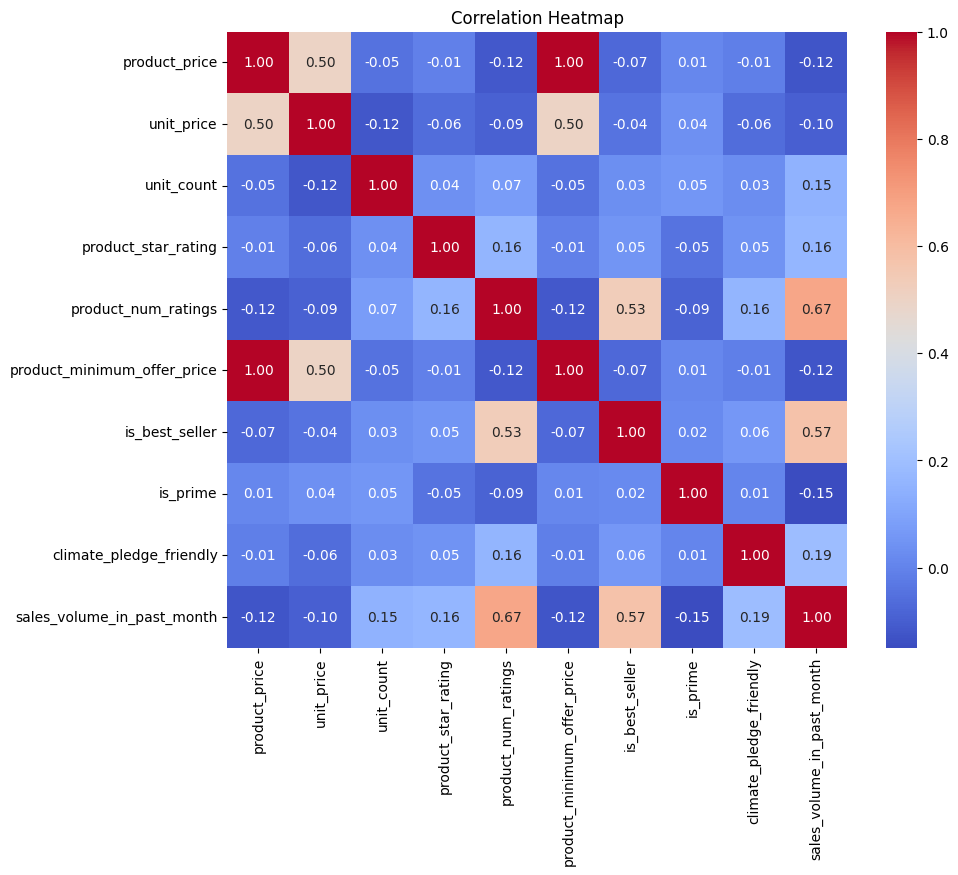

In [ ]:
# Include boolean columns along with numerical columns
numerical_columns = df_amazon_dropped.select_dtypes(include=['number', 'bool']).columns

# Compute correlation matrix
correlation_matrix = df_amazon_dropped[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## We see a rather predictable correlation result

For example, the 1.0 correlation between product_minimum_offer_price and product_price suggests that they are similar in this sample.

The high correlation of 0.66 between the sales volume of a particular product in the last month and the number of reviews left seems quite logical.

We can also notice a positive correlation of 0.55 between the same sales volume and is the product a bestseller (in my opinion this correlation should be higher).

A positive correlation of 0.5 suggests a relationship between whether a product is a bestseller and the number of reviews left.

There is a small negative correlation (-0.17) between sales volume and the price of the product, i.e. the higher the price, the less often it is bought.

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_amazon_dropped['product_num_ratings'], df_amazon_dropped['sales_volume_in_past_month'])

# Perform chi-square test for independence
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Test for Independence:")
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_val)

# Interpret the results
alpha = 0.05
if p_val < alpha:
    print("There is a significant relationship between the number of ratings and sales volume.")
else:
    print("There is no significant relationship between the number of ratings and sales volume.")


Chi-Square Test for Independence:
Chi-Square Statistic: 8079.561336898396
P-Value: 0.0011554496373804499
There is a significant relationship between the number of ratings and sales volume.


In [ ]:
from scipy import stats

# Extract sales volume for best sellers and non-best sellers
best_seller_sales = df_amazon_dropped[df_amazon_dropped['is_best_seller']]['sales_volume_in_past_month']
non_best_seller_sales = df_amazon_dropped[~df_amazon_dropped['is_best_seller']]['sales_volume_in_past_month']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(best_seller_sales, non_best_seller_sales)

# Print the results
print("Independent Samples T-Test:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in sales volume between best sellers and non-best sellers.")
else:
    print("There is no significant difference in sales volume between best sellers and non-best sellers.")


Independent Samples T-Test:
T-Statistic: 12.57072810086585
P-Value: 9.286062818537718e-30
There is a significant difference in sales volume between best sellers and non-best sellers.


# Data Exploration: The First Total Data (From API)

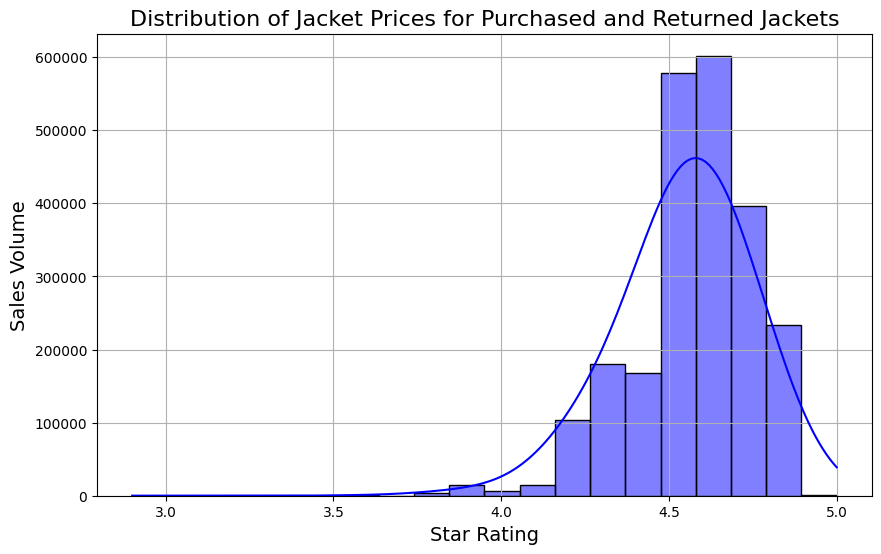

In [ ]:
# Aggregate sales volume per star rating
sales_volume_per_stars = df_amazon_dropped.groupby('product_star_rating')['sales_volume_in_past_month'].sum().reset_index()

title = 'Distribution of Jacket Prices for Purchased and Returned Jackets'

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=sales_volume_per_stars, x='product_star_rating', weights='sales_volume_in_past_month', bins=20, color='blue', kde=True)

# Set title and labels
plt.title(title, fontsize=16)
plt.xlabel('Star Rating', fontsize=14)
plt.ylabel('Sales Volume', fontsize=14)
plt.grid(True)

# Display the plot
plt.show()

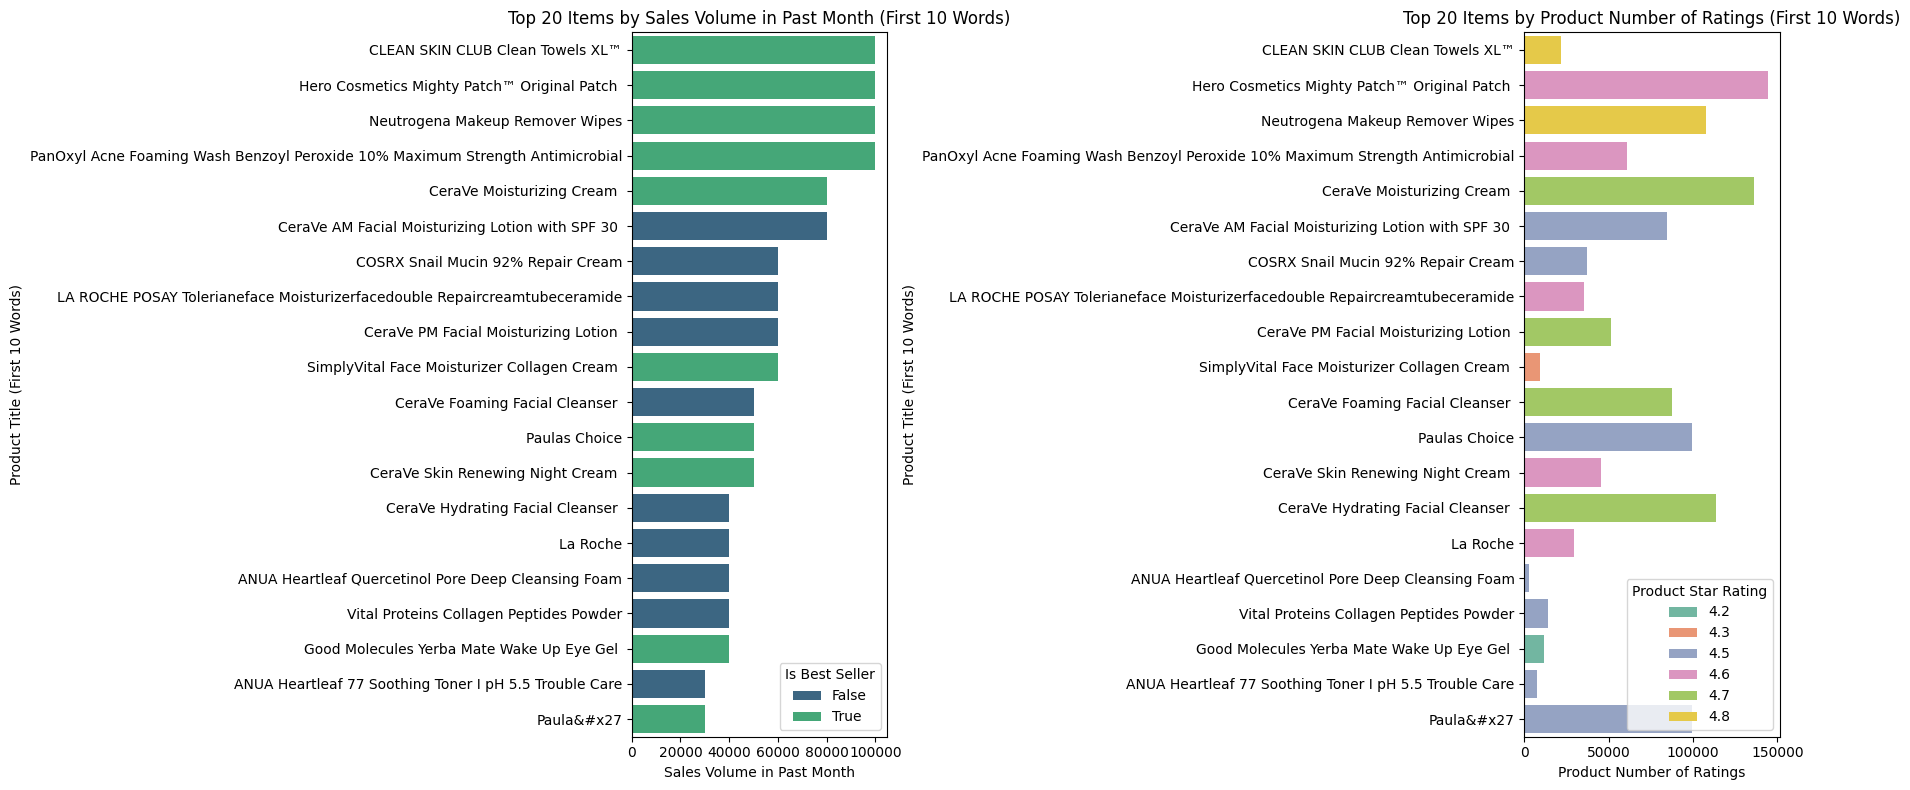

In [ ]:
# Sort the DataFrame by sales_volume_in_past_month in descending order and select the top 20 rows
top_20_sales_items = df_amazon_dropped.sort_values(by='sales_volume_in_past_month', ascending=False).head(20)

# Split the product titles into words using the specified separators and select the first 10 words
separators = r',|\\|/|\||;|-'
top_20_sales_items['product_title_short'] = top_20_sales_items['product_title'].str.split(separators, n=1).str[0]

# Create subplots with two bar plots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# First subplot: Sales Volume
sns.barplot(ax=axes[0], x='sales_volume_in_past_month', y='product_title_short', data=top_20_sales_items, hue='is_best_seller', palette='viridis')
axes[0].set_title('Top 20 Items by Sales Volume in Past Month (First 10 Words)')
axes[0].set_xlabel('Sales Volume in Past Month')
axes[0].set_ylabel('Product Title (First 10 Words)')
axes[0].legend(title='Is Best Seller')

# Second subplot: Product Number of Ratings
sns.barplot(ax=axes[1], x='product_num_ratings', y='product_title_short', data=top_20_sales_items, hue='product_star_rating', palette='Set2')
axes[1].set_title('Top 20 Items by Product Number of Ratings (First 10 Words)')
axes[1].set_xlabel('Product Number of Ratings')
axes[1].set_ylabel('Product Title (First 10 Words)')
axes[1].legend(title='Product Star Rating')

plt.tight_layout()
plt.show()

# Creating the second Data (Top 100): File Top_100.ipynb

# Creating a column with Product Types (From API)

In [ ]:
# List of item forms to search for
item_forms = [
    'cream', 'lotion', 'serum', 'gel', 'oil', 'balm', 'mask',
    'cleanser', 'toner', 'essence', 'mist', 'sunscreen', 'exfoliant',
    'ampoule', 'patches', 'wipes', 'foam', 'scrub', 'roller', 'patch', 'headbands',
    'ointment', 'treatment', 'set', 'cleansing', 'kit', 'supplement', 'powder',
    'fluid', 'màsk', 'pads', 'cloths', 'emulsion', 'wash', 'liquid', 'crem', 'moisturizer',
    'tool', 'skincare', 'tonic', 'towel', 'towels', 'butter', 'spray', 'moisture', 'moisturizer',
    'trio', 'tweezer', 'stick'
]

# Function to find the first matching item form in the product title
def find_item_form(title):
    for form in item_forms:
        if form.lower()=='crem' in title.lower():
          return 'cream'
        elif form.lower()=='patch' in title.lower():
          return 'patches'
        elif form.lower()=='màsk' in title.lower():
          return 'mask'
        elif form.lower()=='towel' in title.lower():
          return 'towels'
        elif form.lower()=='moisture' in title.lower():
            return 'moisturizer'
        elif form.lower()=='trio' in title.lower():
            return 'set'
        elif form.lower()=='cleansing' in title.lower():
            return 'cleanser'
        elif form.lower() in title.lower():
            return form
    return 'other'  # If no match is found

# Apply the function to the product_title column to create a new item_form column
df_amazon_dropped['item_form'] = df_amazon_dropped['product_title'].apply(find_item_form)

# Filter the DataFrame to get rows where item_form is 'Other'
other_items = df_amazon_dropped[df_amazon_dropped['item_form'] == 'other']

# Print the product titles of the filtered rows
print(other_items[['product_title', 'product_url']])

                product_title                           product_url
251  philosophy microdelivery  https://www.amazon.com/dp/B0BPTN7464


In [ ]:
df_amazon_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   asin                         324 non-null    object 
 1   product_title                324 non-null    object 
 2   product_price                324 non-null    float64
 3   unit_price                   324 non-null    float64
 4   unit_count                   324 non-null    int64  
 5   product_star_rating          324 non-null    float64
 6   product_num_ratings          324 non-null    int64  
 7   product_url                  324 non-null    object 
 8   product_minimum_offer_price  324 non-null    float64
 9   is_best_seller               324 non-null    bool   
 10  is_prime                     324 non-null    bool   
 11  climate_pledge_friendly      324 non-null    bool   
 12  sales_volume_in_past_month   324 non-null    int64  
 13  delivery            

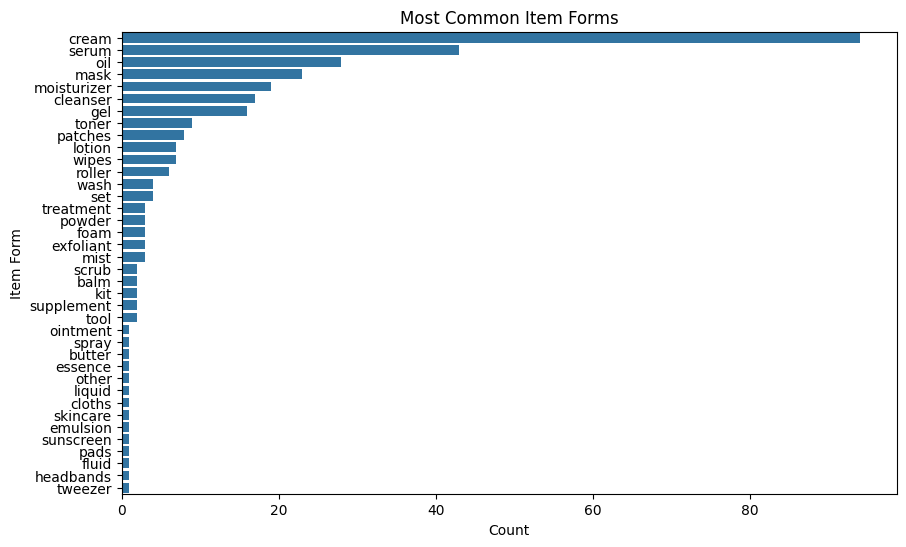

In [ ]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Plot the counts of each item form
sns.countplot(y='item_form', data=df_amazon_dropped, order=df_amazon_dropped['item_form'].value_counts().index)

# Set the title and labels
plt.title('Most Common Item Forms')
plt.xlabel('Count')
plt.ylabel('Item Form')

# Show the plot
plt.show()

In [ ]:
# List of special keywords
special_keywords = ['lip', 'lips', 'eye', 'eyes', 'face', 'facial', 'foot', 'hand', 'hands', 'body', 'age', 'aging', 'cleansing', 'shave', 'men', 'man', 'skin', 'sun', 'acne']

# Function to find the first matching special keyword in the product title
def find_special_keyword(title):
    for kw in special_keywords:
        if kw.lower() == 'man' in title.lower():
            return 'men'
        elif kw.lower() == 'facial' in title.lower():
            return 'face'
        elif kw.lower() == 'lip' in title.lower():
            return 'lips'
        elif kw.lower() == 'eyes' in title.lower():
            return 'eye'
        elif kw.lower() == 'hands' in title.lower():
            return 'hand'
        elif kw.lower() == 'aging' in title.lower():
            return 'age'
        elif kw in title.lower():
            return kw
    return ''  # If no match is found

# Create a new column 'special_keyword' by applying the find_special_keyword function
df_amazon_dropped['cosmetic_object'] = df_amazon_dropped['product_title'].apply(find_special_keyword)

# Create a new column 'special_form' by combining keywords and item_forms
df_amazon_dropped['special_item_form'] = df_amazon_dropped['cosmetic_object'] + ' ' + df_amazon_dropped['item_form']

# Filter the DataFrame to get rows where item_form is 'Other'
other_special_items = df_amazon_dropped[df_amazon_dropped['cosmetic_object'] == '']

# Print the product titles of the filtered rows
print(other_special_items['product_title'])

35           SOL DE JANEIRO Brazilian Bum Bum Cream 75ml
46     THE ORDINARY The Daily Set (3 Pcs: Squalane Cl...
92                                SOL DE JANEIRO Jet Set
130    HERO COSMETICS Rescue Balm &amp; Red Correct P...
142             Eminence Bamboo Firming Fluid, 1.2 Ounce
162    Drunk Elephant Hydra and The Bright - Includes...
180    Caudalie Vinoperfect Brightening Dark Spot Ser...
199    Mighty Patch Micropoint from Hero Cosmetics - ...
214    LANEIGE Water Bank Blue Hyaluronic Gel Moistur...
230    Principal Secret Advanced – Gentle Deep 4-in-1...
234                 Mario Badescu Drying Lotion, 1 Fl oz
238    Beauty of Joseon Red Bean Refreshing Pore Mask...
251                             philosophy microdelivery
258    Artnaturals Salicylic acid Serum - Advanced Se...
274    Clinique Turnaround Overnight Revitalizing Moi...
276    Clinique Moisture Surge Sheertint Hydrator Bro...
281    Clinique Even Better Clinical Brightening Mois...
284    Clinique Even Better Bri

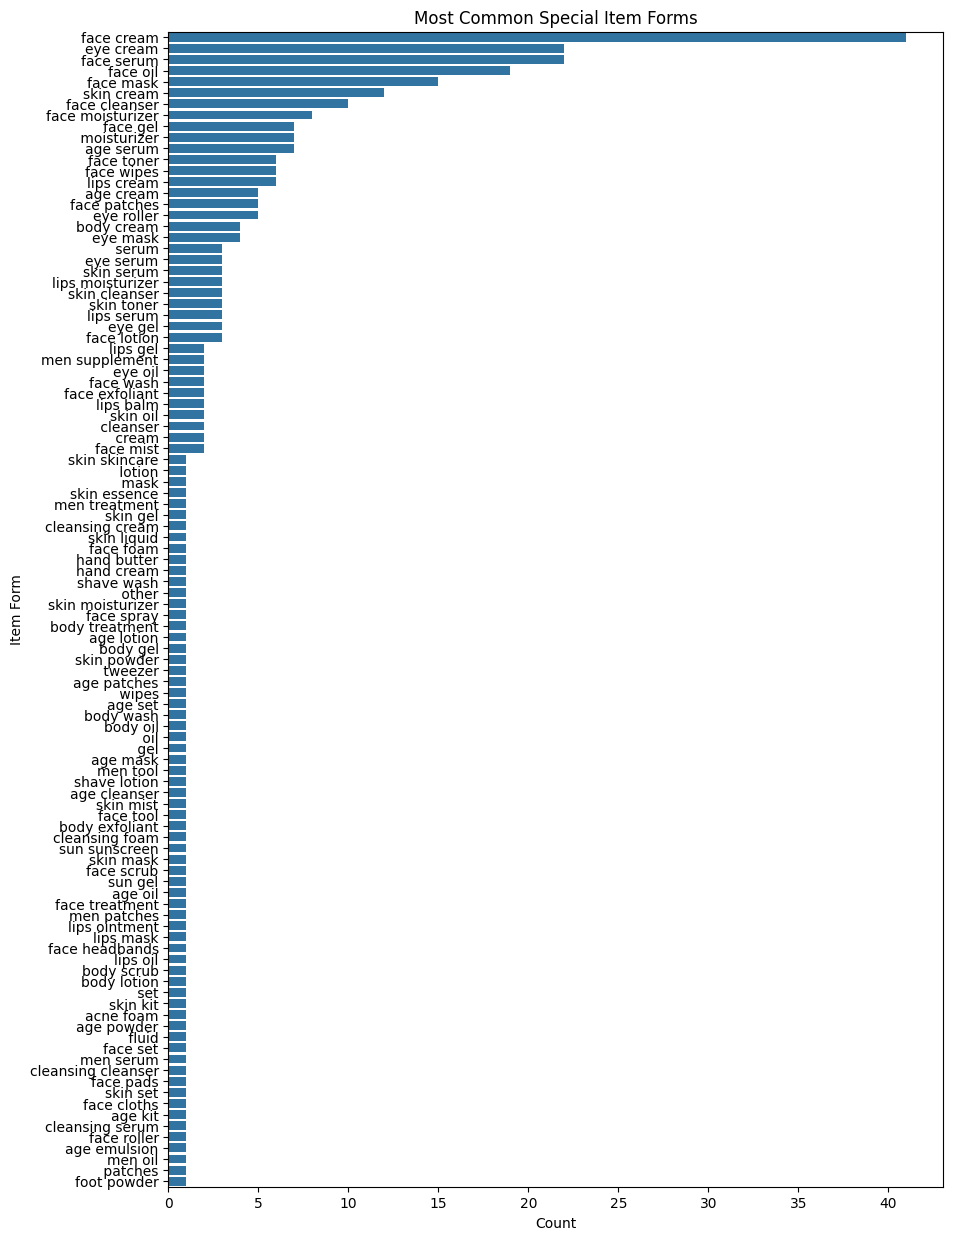

In [ ]:
# Set the size of the plot
plt.figure(figsize=(10, 15))

# Plot the counts of each item form
sns.countplot(y='special_item_form', data=df_amazon_dropped, order=df_amazon_dropped['special_item_form'].value_counts().index)

# Set the title and labels
plt.title('Most Common Special Item Forms')
plt.xlabel('Count')
plt.ylabel('Item Form')

# Show the plot
plt.show()

In [ ]:
df_amazon_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   asin                         324 non-null    object 
 1   product_title                324 non-null    object 
 2   product_price                324 non-null    float64
 3   unit_price                   324 non-null    float64
 4   unit_count                   324 non-null    int64  
 5   product_star_rating          324 non-null    float64
 6   product_num_ratings          324 non-null    int64  
 7   product_url                  324 non-null    object 
 8   product_minimum_offer_price  324 non-null    float64
 9   is_best_seller               324 non-null    bool   
 10  is_prime                     324 non-null    bool   
 11  climate_pledge_friendly      324 non-null    bool   
 12  sales_volume_in_past_month   324 non-null    int64  
 13  delivery            

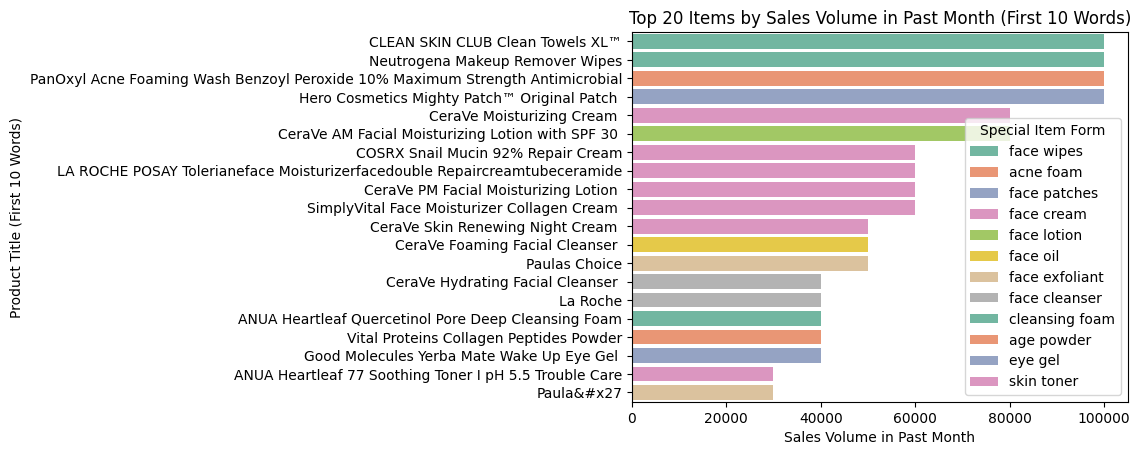

In [ ]:
# Sort the DataFrame by sales_volume_in_past_month in descending order and select the top 20 rows
top_20_sales_items = df_amazon_dropped.sort_values(by='sales_volume_in_past_month', ascending=False).head(20)

# Split the product titles into words using the specified separators and select the first 10 words
separators = r',|\\|/|\||;|-'
top_20_sales_items['product_title_short'] = top_20_sales_items['product_title'].str.split(separators, n=1).str[0]

# Sort the DataFrame by sales volume and reset the index
sorted_top_20_sales_items = top_20_sales_items.sort_values(by='sales_volume_in_past_month', ascending=False).reset_index(drop=True)

# Create the bar plot
ax = sns.barplot(x='sales_volume_in_past_month', y='product_title_short', data=sorted_top_20_sales_items, hue='special_item_form', palette='Set2')
plt.title('Top 20 Items by Sales Volume in Past Month (First 10 Words)')
plt.xlabel('Sales Volume in Past Month')
plt.ylabel('Product Title (First 10 Words)')
plt.legend(title='Special Item Form', loc='lower right')

plt.show()


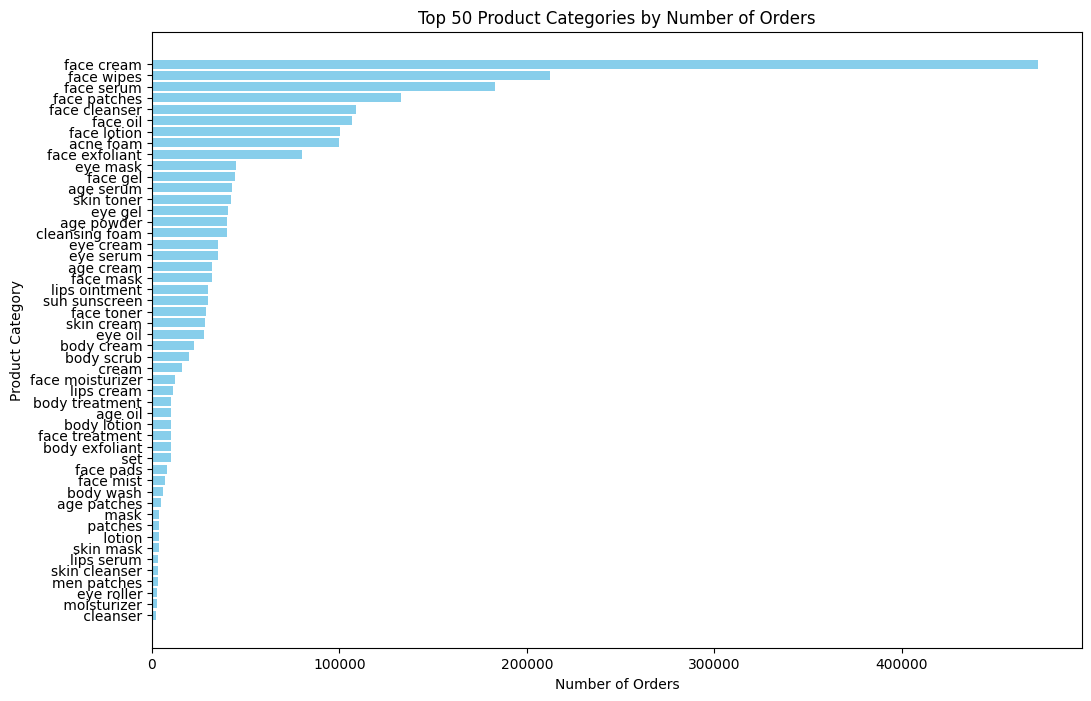

In [ ]:
# Group the DataFrame by the 'special_item_form' column and sum the 'sales_volume_in_past_month' for each category
orders_by_category = df_amazon_dropped.groupby('special_item_form')['sales_volume_in_past_month'].sum().reset_index()

# Sort the DataFrame by the number of orders in descending order
orders_by_category = orders_by_category.sort_values(by='sales_volume_in_past_month', ascending=False)

# Sort the DataFrame by the number of orders in descending order and select the top 50 rows
top_50_categories = orders_by_category.sort_values(by='sales_volume_in_past_month', ascending=False).head(50)

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.barh(top_50_categories['special_item_form'], top_50_categories['sales_volume_in_past_month'], color='skyblue')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')
plt.title('Top 50 Product Categories by Number of Orders')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest category on top
plt.show()


In [ ]:
# Save the DataFrame to an Excel file
sorted_top_20_sales_items.to_excel('sorted_top_20_sales_items.xlsx', index=False)


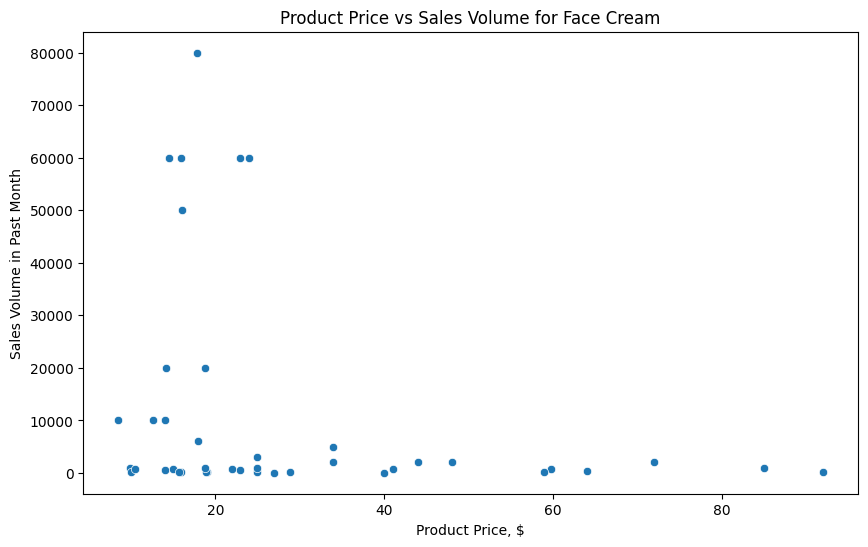

In [ ]:
# Filter the DataFrame for 'face cream' items
face_cream_df = df_amazon_dropped[df_amazon_dropped['special_item_form'] == 'face cream']

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=face_cream_df, x='product_price', y='sales_volume_in_past_month')
plt.title('Product Price vs Sales Volume for Face Cream')
plt.xlabel('Product Price, $')
plt.ylabel('Sales Volume in Past Month')
plt.show()

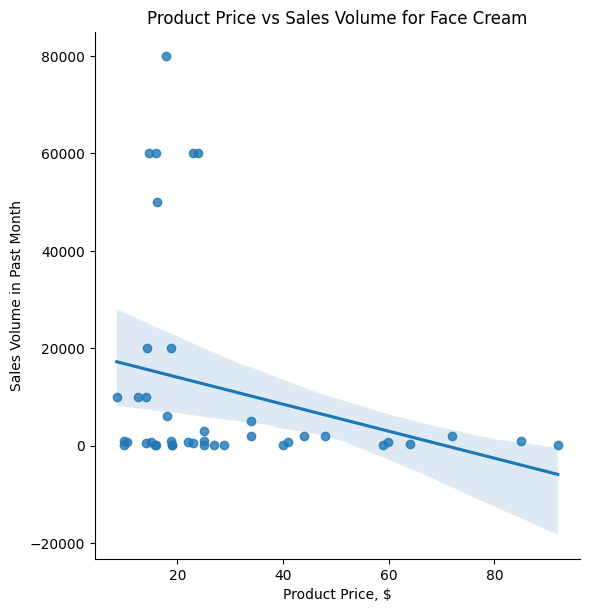

In [ ]:
# Create the scatter plot with regression line and additional statistics
sns.lmplot(x='product_price', y='sales_volume_in_past_month', data=face_cream_df, height=6)
plt.title('Product Price vs Sales Volume for Face Cream')
plt.xlabel('Product Price, $')
plt.ylabel('Sales Volume in Past Month')
plt.show()

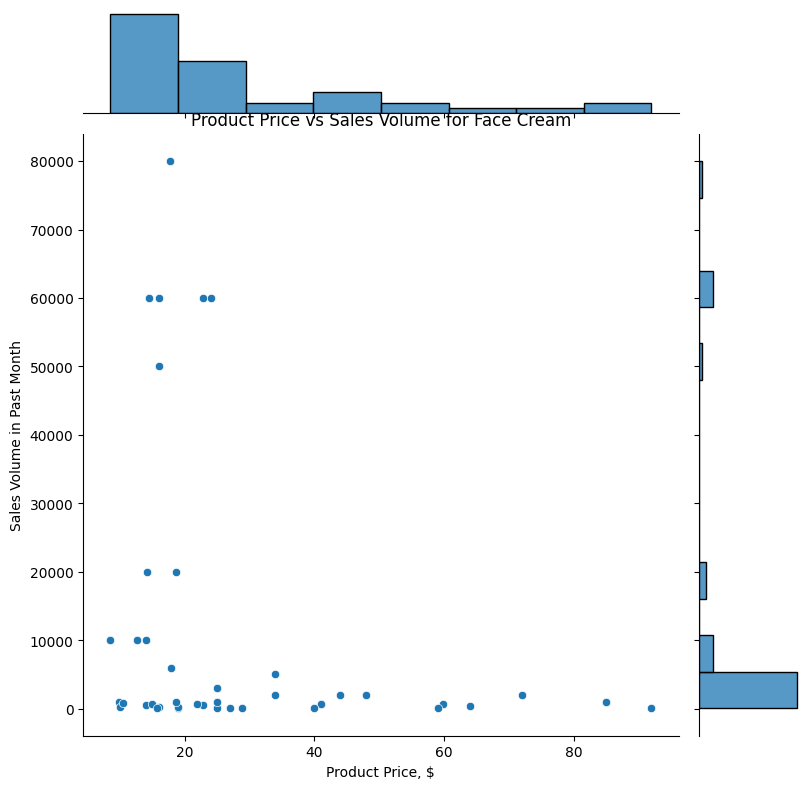

In [ ]:
# Create the jointplot
sns.jointplot(x='product_price', y='sales_volume_in_past_month', data=face_cream_df, height=8)
plt.title('Product Price vs Sales Volume for Face Cream')
plt.xlabel('Product Price, $')
plt.ylabel('Sales Volume in Past Month')
plt.show()

In [ ]:
# Filter the DataFrame for 'face cream' items with sales volume > 10000
face_cream_high_sales_df = df_amazon_dropped[(df_amazon_dropped['special_item_form'] == 'face cream') & (df_amazon_dropped['sales_volume_in_past_month'] > 10000)]

# Print the filtered DataFrame
print(face_cream_high_sales_df)

           asin                                      product_title  \
13   B00SNPCSUY  CeraVe Skin Renewing Night Cream | Niacinamide...   
19   B00TTD9BRC  CeraVe Moisturizing Cream | Body and Face Mois...   
24   B01N9SPQHQ  LA ROCHE POSAY Tolerianeface Moisturizerfacedo...   
40   B00HNSSPHC  Neutrogena Triple Age Repair Anti-Aging Daily ...   
51   B0BBSP2JNQ  SimplyVital Face Moisturizer Collagen Cream - ...   
52   B00365DABC  CeraVe PM Facial Moisturizing Lotion | Night C...   
62   B01LEJ5MSK  COSRX Snail Mucin 92% Repair Cream, Daily Face...   
123  B07YLJPMC3  CeraVe Acne Foaming Cream Cleanser | Acne Trea...   

     product_price  unit_price  unit_count  product_star_rating  \
13           16.10        9.47           2                  4.6   
19           17.78        0.94          19                  4.7   
24           23.99        9.60           2                  4.6   
40           18.74       11.02           2                  4.5   
51           22.89       13.46    

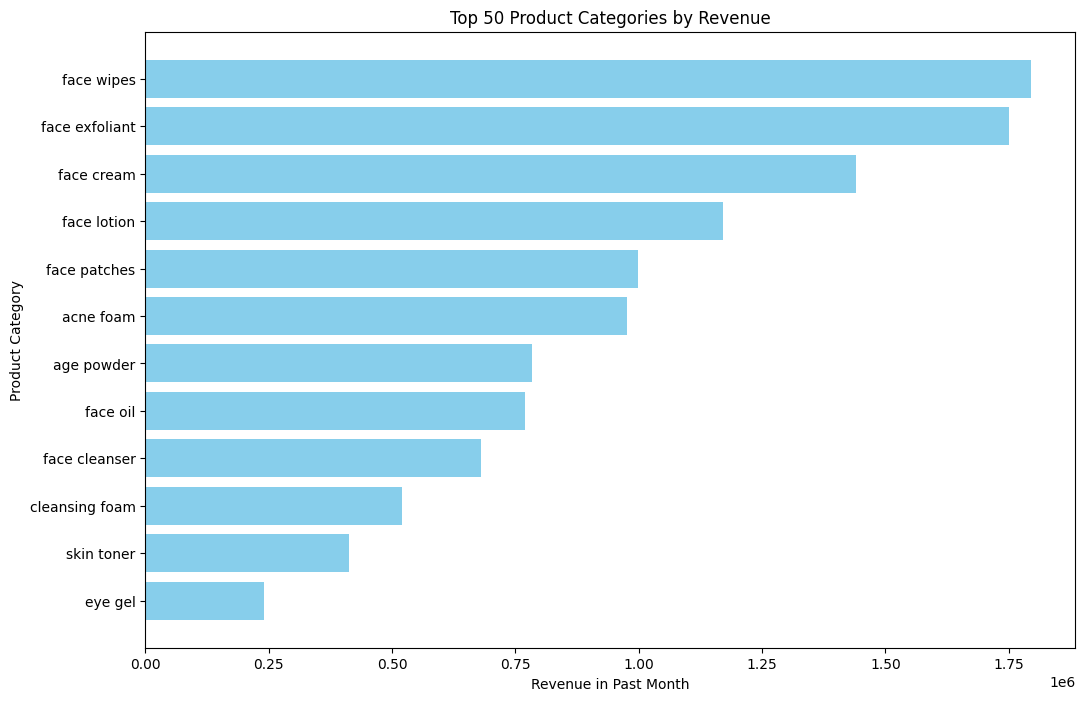

In [ ]:
# Calculate revenue for each product
sorted_top_20_sales_items['revenue_in_month'] = sorted_top_20_sales_items['product_price'] * sorted_top_20_sales_items['sales_volume_in_past_month']

# Sort the DataFrame by revenue in descending order and select the top 50 rows
top_50_revenue_items = sorted_top_20_sales_items.sort_values(by='revenue_in_month', ascending=False).head(50)

# Create the plot
plt.figure(figsize=(12, 8))
plt.barh(top_50_revenue_items['special_item_form'], top_50_revenue_items['revenue_in_month'], color='skyblue')
plt.xlabel('Revenue in Past Month')
plt.ylabel('Product Category')
plt.title('Top 50 Product Categories by Revenue')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest revenue at the top
plt.show()

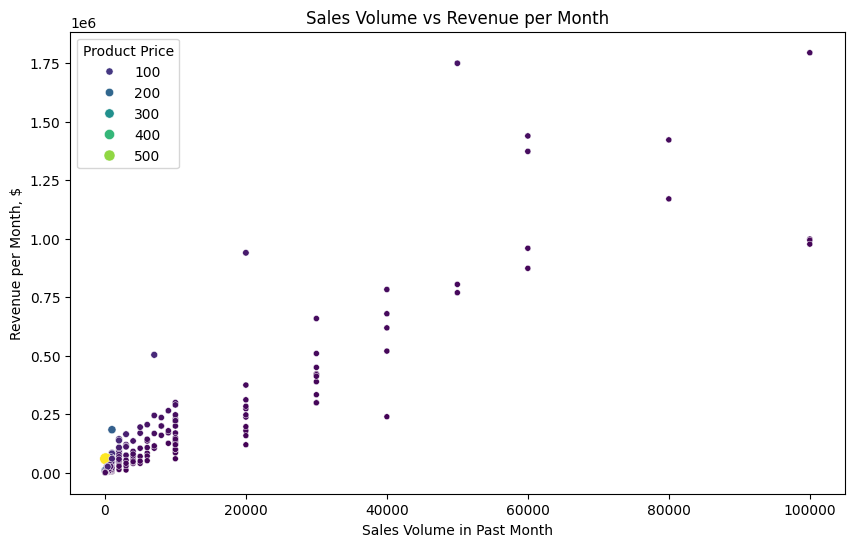

In [ ]:
# Calculate revenue_in_month
df_amazon_dropped['revenue_in_month'] = df_amazon_dropped['product_price'] * df_amazon_dropped['sales_volume_in_past_month']

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_amazon_dropped, x='sales_volume_in_past_month', y='revenue_in_month', hue='product_price', size='product_price', palette='viridis')
plt.title('Sales Volume vs Revenue per Month')
plt.xlabel('Sales Volume in Past Month')
plt.ylabel('Revenue per Month, $')
plt.legend(title='Product Price')
plt.show()

# Brands

In [ ]:
# Function to extract brand name from HTML content fetched from URL
def extract_brand_name_from_url(url):
    try:
        # Fetch the HTML content from the URL
        response = requests.get(url)
        if response.status_code == 200:
            # Parse the HTML content
            soup = BeautifulSoup(response.text, 'html.parser')

            # Try finding the brand name in the detailed section of the HTML content
            detailed_section = soup.find('div', class_='a-section a-spacing-small a-spacing-top-small')
            if detailed_section:
                brand_tr = detailed_section.find('tr', class_='a-spacing-small po-brand')
                if brand_tr:
                    brand_element = brand_tr.find('span', class_='a-size-base po-break-word')
                    if brand_element:
                        return brand_element.text.strip()
                    else:
                        print(f"Brand element not found in {url}")
                else:
                    print(f"Brand row not found in {url}")
            else:
                print(f"Detailed section not found in {url}")
        else:
            print(f"Failed to fetch the page. Status code: {response.status_code}")
        return None
    except Exception as e:
        print(f"Error while processing URL {url}: {e}")
        return None

# Apply the function to each URL in the 'product_url' column
df_amazon_dropped['brand'] = df_amazon_dropped['product_url'].apply(extract_brand_name_from_url)

# Display the DataFrame with the extracted brand names
print(df_amazon_dropped[['product_url', 'brand']])

Failed to fetch the page. Status code: 500
Failed to fetch the page. Status code: 500
Failed to fetch the page. Status code: 500
Brand row not found in https://www.amazon.com/dp/B07P5TMHD9
Failed to fetch the page. Status code: 500
Detailed section not found in https://www.amazon.com/dp/B09KNJGXF1
Brand row not found in https://www.amazon.com/dp/B0BR6BQ4MZ
Failed to fetch the page. Status code: 500
Brand row not found in https://www.amazon.com/dp/B09W5ZQQ1W
Detailed section not found in https://www.amazon.com/dp/B0B8MJTCS6
Detailed section not found in https://www.amazon.com/dp/B01B3QIEPC
Failed to fetch the page. Status code: 500
Failed to fetch the page. Status code: 500
Failed to fetch the page. Status code: 500
Brand row not found in https://www.amazon.com/dp/B07XJ7XWLW
Failed to fetch the page. Status code: 500
Failed to fetch the page. Status code: 500
Brand row not found in https://www.amazon.com/dp/B072K1LNNY
Detailed section not found in https://www.amazon.com/dp/B01AOWZ2BU
Br

In [ ]:
df_amazon_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   asin                         324 non-null    object 
 1   product_title                324 non-null    object 
 2   product_price                324 non-null    float64
 3   unit_price                   324 non-null    float64
 4   unit_count                   324 non-null    int64  
 5   product_star_rating          324 non-null    float64
 6   product_num_ratings          324 non-null    int64  
 7   product_url                  324 non-null    object 
 8   product_minimum_offer_price  324 non-null    float64
 9   is_best_seller               324 non-null    bool   
 10  is_prime                     324 non-null    bool   
 11  climate_pledge_friendly      324 non-null    bool   
 12  sales_volume_in_past_month   324 non-null    int64  
 13  delivery            

In [ ]:
# Replace None values with the first word from the 'product_title' column
df_amazon_dropped['brand'].fillna(df_amazon_dropped['product_title'].str.split().str[0], inplace=True)

df_amazon_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   asin                         324 non-null    object 
 1   product_title                324 non-null    object 
 2   product_price                324 non-null    float64
 3   unit_price                   324 non-null    float64
 4   unit_count                   324 non-null    int64  
 5   product_star_rating          324 non-null    float64
 6   product_num_ratings          324 non-null    int64  
 7   product_url                  324 non-null    object 
 8   product_minimum_offer_price  324 non-null    float64
 9   is_best_seller               324 non-null    bool   
 10  is_prime                     324 non-null    bool   
 11  climate_pledge_friendly      324 non-null    bool   
 12  sales_volume_in_past_month   324 non-null    int64  
 13  delivery            

In [ ]:
# Write the cleaned DataFrame to a new Excel file
df_amazon_dropped.to_excel('df_amazon_v4.xlsx', index=False)

In [ ]:
df_amazon_dropped = pd.read_excel('df_amazon_v4.xlsx')

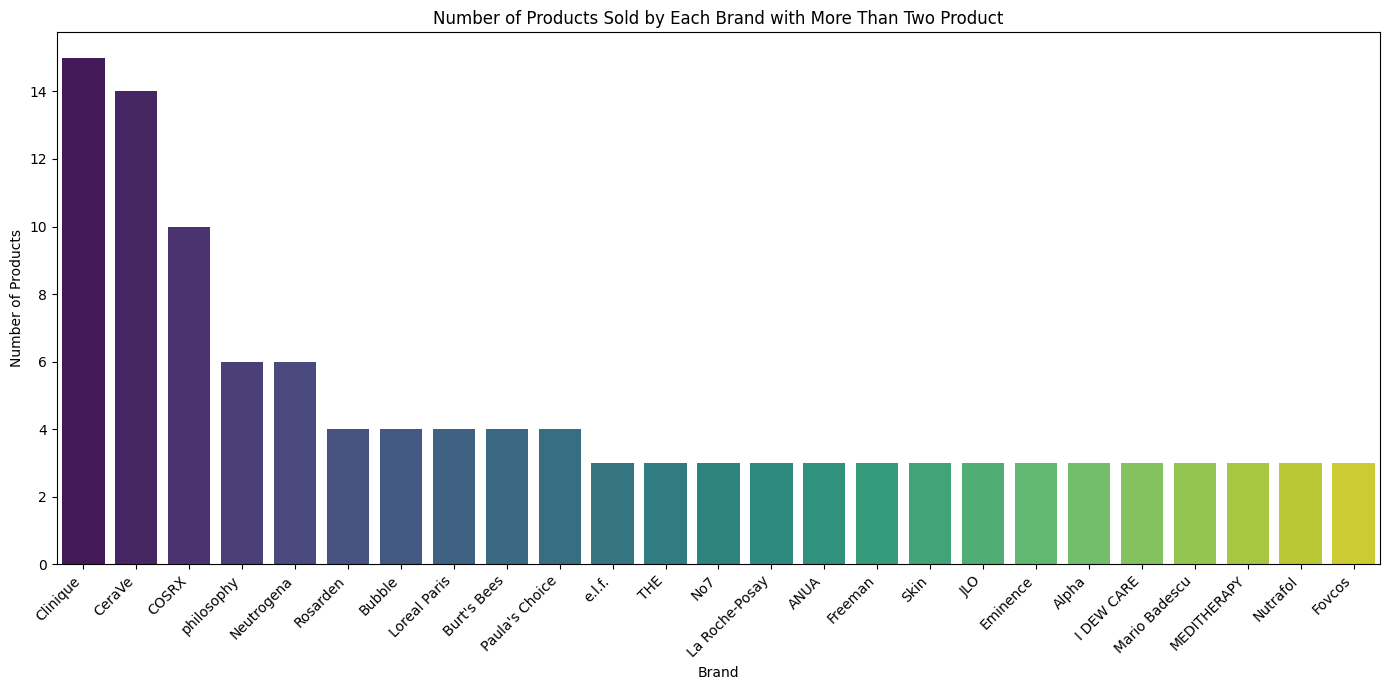

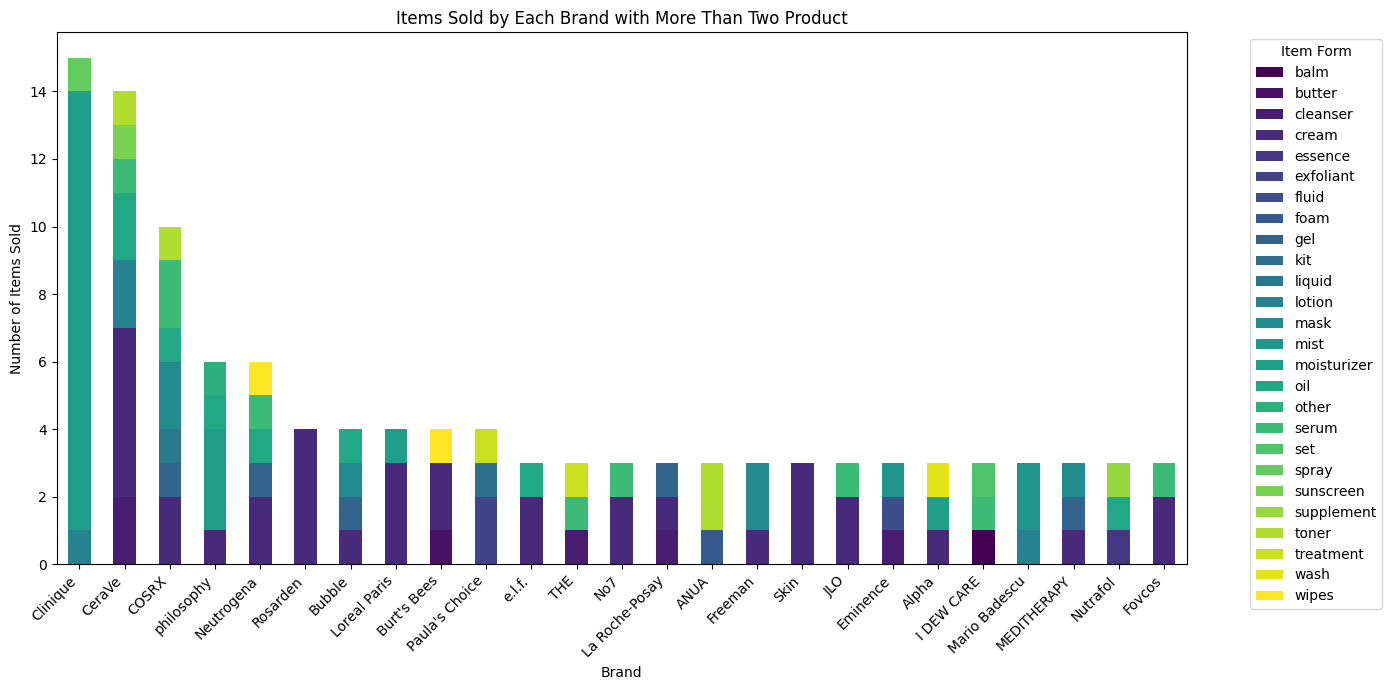

In [ ]:
# Extract unique brands and their counts
brand_counts = df_amazon_dropped['brand'].value_counts()

# Filter brands with more than one product
brands_with_multiple_products = brand_counts[brand_counts > 2].index

# Filter the dataframe to include only those brands
filtered_df = df_amazon_dropped[df_amazon_dropped['brand'].isin(brands_with_multiple_products)]

# Visualize the number of products each brand sells
plt.figure(figsize=(14, 7))
brand_product_counts = filtered_df['brand'].value_counts()
sns.barplot(x=brand_product_counts.index, y=brand_product_counts.values, hue=brand_product_counts.index, dodge=False, palette='viridis')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.title('Number of Products Sold by Each Brand with More Than Two Product')
plt.xticks(rotation=45, ha='right')
plt.legend([],[], frameon=False)  # Disable legend
plt.tight_layout()
plt.show()

# Get special item counts and align the order with brand_product_counts
special_item_counts = filtered_df.groupby('brand')['item_form'].value_counts().unstack().fillna(0)

# Align the special_item_counts to match the order of brand_product_counts
special_item_counts = special_item_counts.loc[brand_product_counts.index]

# Plot special items sold by each brand
ax = special_item_counts.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.xlabel('Brand')
plt.ylabel('Number of Items Sold')
plt.title('Items Sold by Each Brand with More Than Two Product')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Item Form', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

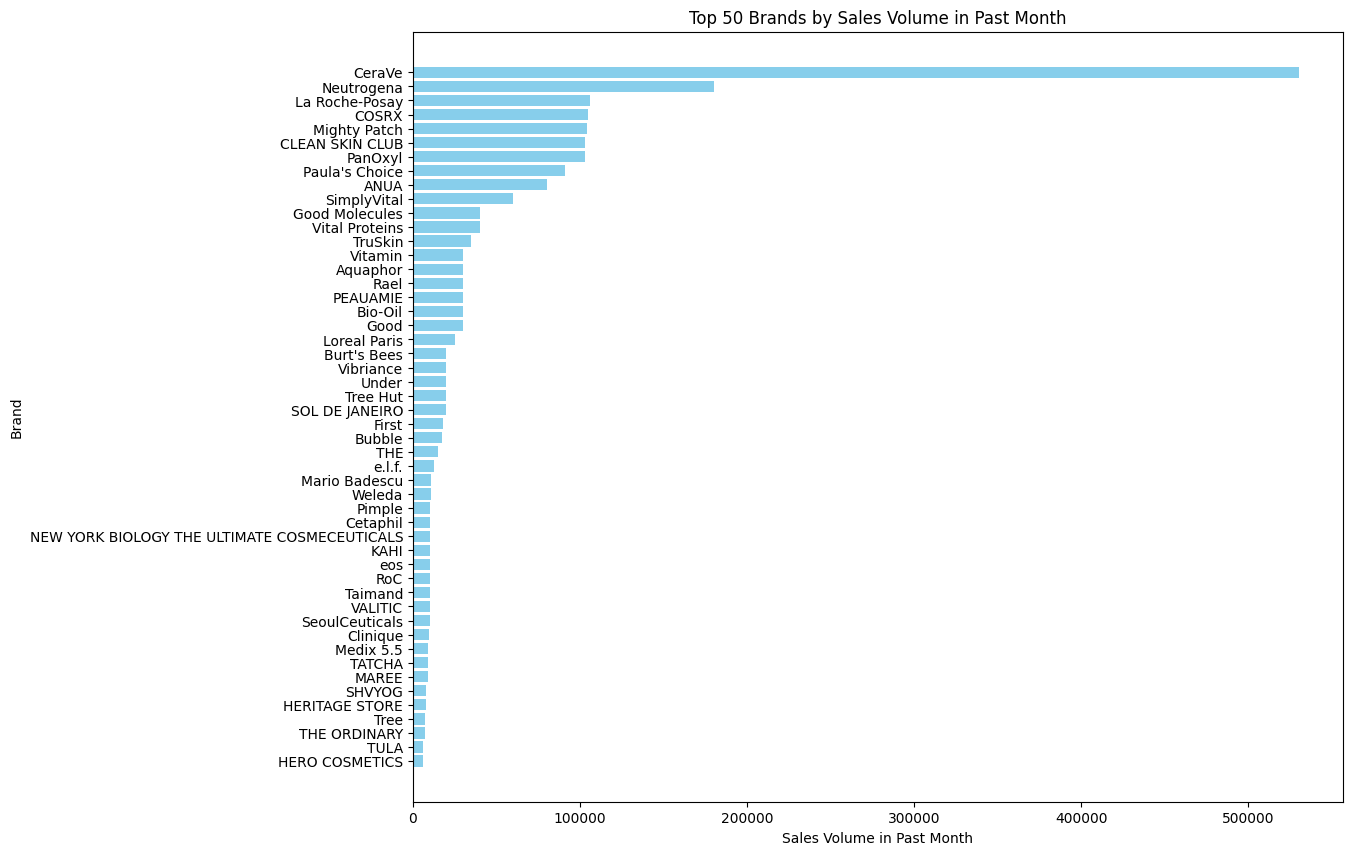

In [ ]:
# Extract unique brands and their total sales volume in the past month
brand_sales_volume = df_amazon_dropped.groupby('brand')['sales_volume_in_past_month'].sum().reset_index()

# Sort the DataFrame by the sales volume in descending order
brand_sales_volume = brand_sales_volume.sort_values(by='sales_volume_in_past_month', ascending=False)

# Select the top 50 brands
top_50_brands = brand_sales_volume.head(50)

# Create a horizontal bar plot
plt.figure(figsize=(12, 10))
plt.barh(top_50_brands['brand'], top_50_brands['sales_volume_in_past_month'], color='skyblue')
plt.xlabel('Sales Volume in Past Month')
plt.ylabel('Brand')
plt.title('Top 50 Brands by Sales Volume in Past Month')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest sales volume brand on top
plt.show()

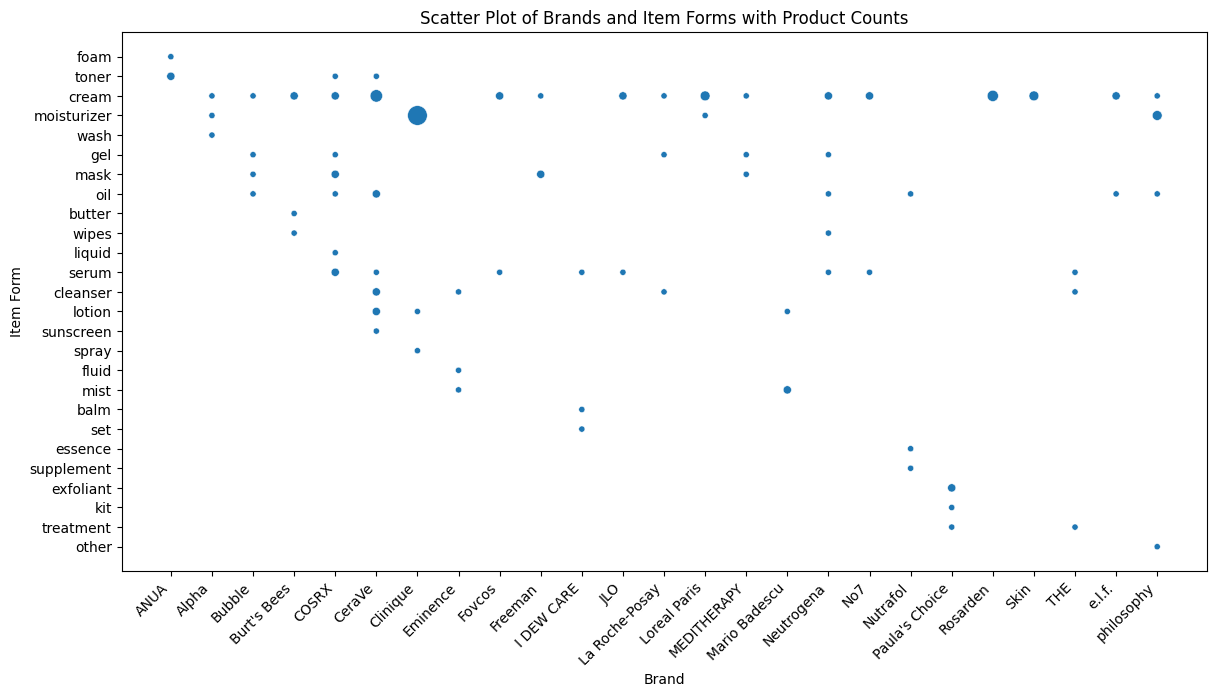

In [ ]:
# Create a count of brand and item_form combinations
brand_item_counts = filtered_df.groupby(['brand', 'item_form']).size().reset_index(name='count')

# Create the scatter plot
plt.figure(figsize=(14, 7))
scatter = sns.scatterplot(data=brand_item_counts, x='brand', y='item_form', size='count', legend=False, sizes=(20, 200))

# Improve the display of the brand names on the x-axis
plt.xticks(rotation=45, ha='right')
plt.xlabel('Brand')
plt.ylabel('Item Form')
plt.title('Scatter Plot of Brands and Item Forms with Product Counts')
plt.show()

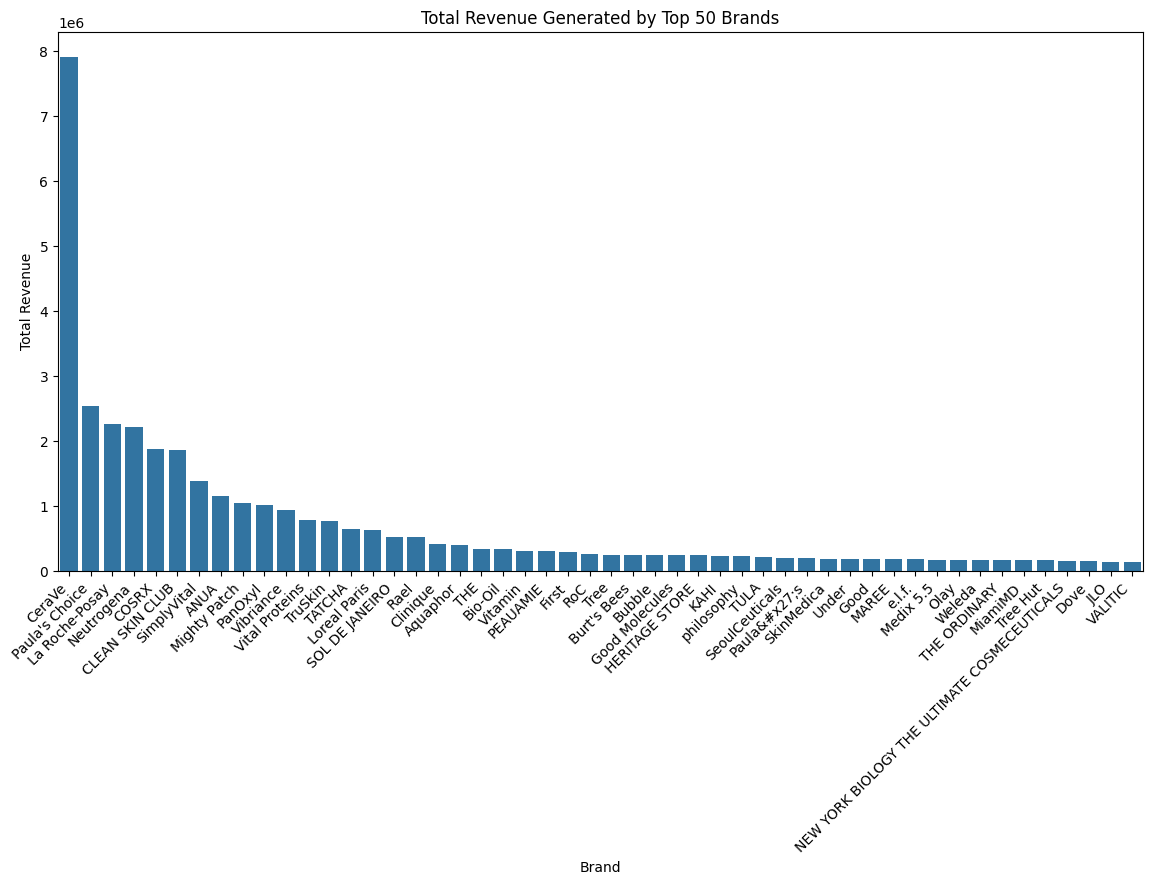

In [ ]:
# Group the data by brand and sum the revenue
brand_revenue = df_amazon_dropped.groupby('brand')['revenue_in_month'].sum().sort_values(ascending=False)

# Select the top 50 brands
top_50_brand_revenue = brand_revenue.head(50)

# Create the bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x=top_50_brand_revenue.index, y=top_50_brand_revenue.values)

# Improve the display of the brand names on the x-axis
plt.xticks(rotation=45, ha='right')
plt.xlabel('Brand')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Generated by Top 50 Brands')
plt.show()

In [ ]:
df = pd.read_excel('df_amazon_v4.xlsx')

# Drop the 'revenue_in_month' column
df_amazon_v4 = df.drop(columns=['revenue_in_month'])

In [ ]:
# Load the Excel files into DataFrames
df_combined = pd.read_excel('df_combined.xlsx')
df_top_amazon_v4 = pd.read_excel('df_top_amazon_v4.xlsx')

# Merge the 'brand' column from df_top_amazon into df_combined based on 'product_title'
df_combined = pd.merge(df_combined, df_top_amazon_v4[['product_title', 'brand']], on='product_title', how='left', suffixes=('', '_top_amazon'))

# Merge the 'brand' column from df_amazon_v4 into df_combined based on 'product_title'
df_combined = pd.merge(df_combined, df_amazon_v4[['product_title', 'brand']], on='product_title', how='left', suffixes=('', '_amazon_v4'))

df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_title               369 non-null    object 
 1   sales_volume_in_past_month  369 non-null    int64  
 2   product_star_rating         369 non-null    float64
 3   product_num_ratings         369 non-null    int64  
 4   product_price               369 non-null    float64
 5   item_form                   369 non-null    object 
 6   special_item_form           369 non-null    object 
 7   brand                       57 non-null     object 
 8   brand_amazon_v4             324 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 26.1+ KB


In [ ]:
# Combine the 'brand' and 'brand_amazon_v4' columns
df_combined['brand'] = df_combined['brand'].combine_first(df_combined['brand_amazon_v4'])

# Drop the 'brand_amazon_v4' column
df_combined = df_combined.drop(columns=['brand_amazon_v4'])

df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_title               369 non-null    object 
 1   sales_volume_in_past_month  369 non-null    int64  
 2   product_star_rating         369 non-null    float64
 3   product_num_ratings         369 non-null    int64  
 4   product_price               369 non-null    float64
 5   item_form                   369 non-null    object 
 6   special_item_form           369 non-null    object 
 7   brand                       369 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 23.2+ KB


In [ ]:
# Calculate the 'revenue_in_month' column
df_combined['revenue_in_month'] = df_combined['sales_volume_in_past_month'] * df_combined['product_price']

In [ ]:
# Modify the 'product_title' column
df_combined['product_title'] = df_combined['product_title'].apply(lambda title: title.strip().lower().replace('&amp;', '&').replace(',', '').replace('|', ''))

In [ ]:
df_final_filed = pd.read_excel('final_df_filled.xlsx')

# Merge the 'product_type' column from df_final_filed into df_combined based on 'product_title'
df_combined = pd.merge(df_combined, df_final_filed[['product_title', 'product_type']], on='product_title', how='left')

df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_title               369 non-null    object 
 1   sales_volume_in_past_month  369 non-null    int64  
 2   product_star_rating         369 non-null    float64
 3   product_num_ratings         369 non-null    int64  
 4   product_price               369 non-null    float64
 5   item_form                   369 non-null    object 
 6   special_item_form           369 non-null    object 
 7   brand                       369 non-null    object 
 8   revenue_in_month            369 non-null    float64
 9   product_type                369 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 29.0+ KB


In [ ]:
# Save the updated DataFrame back to an Excel file
df_combined.to_excel('df_combined_v1.xlsx', index=False)

https://c-catalogue.israel-expo.co.il/expo/exhibition

# Delivery

In [ ]:
import re
from datetime import datetime

def parse_delivery_info(text):
    # Check if delivery is free
    if "FREE" in text:
        shipping_value = "FREE"
    else:
        shipping_value = re.search(r'\$\d+', text).group() if re.search(r'\$\d+', text) else ""

    # Extract shipping date
    shipping_date_match = re.search(r'\b(?:Mon|Tue|Wed|Thu|Fri|Sat|Sun), (?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec) \d+', text)
    shipping_date_str = shipping_date_match.group() if shipping_date_match else ""
    shipping_date = None
    if shipping_date_str:
        try:
            shipping_date = datetime.strptime(shipping_date_str + ' ' + str(datetime.now().year), "%a, %b %d %Y").date()
        except ValueError:
            pass

    # Check if faster delivery available
    faster_delivery = "TRUE" if "fastest" in text else "FALSE"

    return shipping_value, shipping_date, faster_delivery

# Apply function to delivery column
df_amazon_dropped["shipping_value"], df_amazon_dropped["shipping_date"], df_amazon_dropped["faster_delivery"] = zip(*df_amazon_dropped["delivery"].apply(parse_delivery_info))

# Display DataFrame
df_amazon_dropped


In [ ]:
# Drop the 'cosmetic_object' column
df_amazon_dropped = df_amazon_dropped.drop(columns=['cosmetic_object', ''])

In [ ]:
# Filter rows with empty cells
rows_with_empty_cells = df_amazon_dropped[df_amazon_dropped.isnull().any(axis=1)]

# Display 'delivery' and 'shipping_date' columns for rows with empty 'delivery' cells
rows_with_empty_cells[['delivery', 'shipping_date']]

delivery shipping_date
7                              FREE delivery Jun 5 - 7          None
14   FREE delivery Jun 7 - 12 Only 7 left in stock ...          None
24                             FREE delivery Jun 6 - 7          None
47   FREE delivery Jun 11 - 13 on $35 of items ship...          None
48                            FREE delivery Jun 7 - 11          None
52             FREE delivery on $35 shipped by Amazon.          None
58   FREE delivery on $35 shipped by Amazon.Only 1 ...          None
77   FREE delivery Jun 12 - 14 Or fastest delivery ...          None
90             FREE delivery on $35 shipped by Amazon.          None
113  FREE delivery Jun 7 - 10 Or fastest delivery T...          None
140                            $5 delivery Jun 17 - 25          None
167  FREE delivery Jun 6 - 10 Or fastest delivery J...          None
182  FREE delivery Jun 15 - 19 on $35 of items ship...          None
192  FREE delivery Jun 10 - 11 Or fastest delivery ...          None
220  FREE delivery Jun 7 - 10 Or fastest delivery T...          None
227  FREE delivery Jun 6 - 10 Only 1 left in stock ...          None
265  FREE delivery Jun 14 - 17 Or fastest delivery ...          None

In [ ]:
# Dictionary mapping index to corresponding shipping dates
index_shipping_dates = {
    7: '2024-06-07',
    14: '2024-06-12',
    24: '2024-06-07',
    47: '2024-06-13',
    48: '2024-06-11',
    52: '2024-06-11',
    58: '2024-06-11',
    77: '2024-06-14',
    90: '2024-06-11',
    113: '2024-06-10',
    140: '2024-06-25',
    167: '2024-06-10',
    182: '2024-06-19',
    192: '2024-06-11',
    220: '2024-06-10',
    227: '2024-06-10',
    265: '2024-06-17'
}

# Fill missing values in 'shipping_date' column based on the dictionary
for index, shipping_date in index_shipping_dates.items():
    if pd.isna(df_amazon_dropped.at[index, 'shipping_date']):
        df_amazon_dropped.at[index, 'shipping_date'] = shipping_date

# Display the updated DataFrame
df_amazon_dropped.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   asin                         324 non-null    object 
 1   product_title                324 non-null    object 
 2   product_price                324 non-null    float64
 3   unit_price                   324 non-null    float64
 4   unit_count                   324 non-null    int64  
 5   product_star_rating          324 non-null    float64
 6   product_num_ratings          324 non-null    int64  
 7   product_url                  324 non-null    object 
 8   product_minimum_offer_price  324 non-null    float64
 9   is_best_seller               324 non-null    bool   
 10  is_prime                     324 non-null    bool   
 11  climate_pledge_friendly      324 non-null    bool   
 12  sales_volume_in_past_month   324 non-null    int64  
 13  delivery            

In [ ]:
# Convert 'shipping_date' column to datetime format
df_amazon_dropped['shipping_date'] = pd.to_datetime(df_amazon_dropped['shipping_date'], errors='coerce')

In [ ]:
df_amazon_dropped

asin                                      product_title  \
0    B09NXS395V  Under Eye Patches - 60 Pcs - 24K Gold Eye Mask...   
1    B0CDH47BN9  Pimple Patches for Face, Hydrocolloid Acne Pat...   
2    B0CNV5SG4S  Sleeping lip mask, Nourish &amp; Hydrate Lip M...   
3    B093Z2HVJC  Glow Recipe PHA + BHA Face Toner - Skin Care T...   
4    B0BS8Y2FLK  Under Eye Patches (30 Pairs) Gold Eye Mask and...   
..          ...                                                ...   
319  B0CZRHL4CW  Bluelayer Double Water Cream(1.76 oz), Blue Ca...   
320  B0D1SHGGM2  Nécessaire The Body Wash. Hinoki. Resurfacing ...   
321  B0CF411BXQ  Dermalogica Stabilizing Repair Cream, Face Moi...   
322  B0BSG8LFGT  Ed Hardy Coconut Kisses Golden Tanning Lotion,...   
323  B0CBT52RGK  All Natural Mens Anti Chafing Powder, Deep Min...   

     product_price  unit_price  unit_count  product_star_rating  \
0             8.99        0.30          30                  4.2   
1             9.99        0.05         200                  4.4   
2             4.99        4.99           1                  4.3   
3            16.00       11.85           1                  4.6   
4             9.99        0.33          30                  4.5   
..             ...         ...         ...                  ...   
319          21.99       12.49           2                  4.9   
320          25.00        2.98           8                  4.5   
321          64.00       37.65           2                  4.6   
322          49.99        3.70          14                  4.1   
323          15.99        2.00           8                  4.6   

     product_num_ratings                           product_url  \
0                   8653  https://www.amazon.com/dp/B09NXS395V   
1                   2053  https://www.amazon.com/dp/B0CDH47BN9   
2                    205  https://www.amazon.com/dp/B0CNV5SG4S   
3                   6075  https://www.amazon.com/dp/B093Z2HVJC   
4                   3662  https://www.amazon.com/dp/B0BS8Y2FLK   
..                   ...                                   ...   
319                   16  https://www.amazon.com/dp/B0CZRHL4CW   
320                  453  https://www.amazon.com/dp/B0D1SHGGM2   
321                   54  https://www.amazon.com/dp/B0CF411BXQ   
322                   41  https://www.amazon.com/dp/B0BSG8LFGT   
323                 1090  https://www.amazon.com/dp/B0CBT52RGK   

     product_minimum_offer_price  is_best_seller  ...  \
0                           8.99           False  ...   
1                           9.99           False  ...   
2                           4.99           False  ...   
3                          16.00           False  ...   
4                           9.99           False  ...   
..                           ...             ...  ...   
319                        21.99           False  ...   
320                        25.00           False  ...   
321                        64.00           False  ...   
322                        49.99           False  ...   
323                        15.99           False  ...   

     climate_pledge_friendly  sales_volume_in_past_month  \
0                      False                       20000   
1                      False                       10000   
2                      False                        1000   
3                      False                        4000   
4                      False                       30000   
..                       ...                         ...   
319                    False                          50   
320                    False                         100   
321                    False                         400   
322                     True                          50   
323                     True                          50   

                                              delivery item_form  \
0    FREE delivery Sun, Jun 9 on $35 of items shipp...       oil   
1    FREE delivery Sun, Jun 9 

In [ ]:
# # Filter rows with empty cells
# rows_with_empty_cells = df_amazon_dropped[df_amazon_dropped.isnull().any(axis=1)]

# # Display 'delivery' and 'shipping_date' columns for rows with empty 'delivery' cells
# rows_with_empty_cells[['delivery', 'shipping_date']]

Empty DataFrame
Columns: [delivery, shipping_date]
Index: []

In [ ]:
# Write the cleaned DataFrame to a new Excel file
df_amazon_dropped.to_excel('df_amazon_v5.xlsx', index=False)

# Machine Learning

In [ ]:
df_amazon_dropped = pd.read_excel('df_combined_v1.xlsx')

In [ ]:
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting the data into train and test sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For data preprocessing
from sklearn.compose import ColumnTransformer  # For applying different preprocessing to different columns
from sklearn.pipeline import Pipeline  # For creating a machine learning pipeline
from sklearn.ensemble import RandomForestRegressor  # For the machine learning model
from sklearn.metrics import mean_squared_error  # For evaluating the model

# Specify columns to include in the feature set
columns_to_include = ['product_star_rating', 'product_price', 'product_type']

# Define features (X) and target variable (y)
X = df_amazon_dropped[columns_to_include]  # Features
y = df_amazon_dropped['sales_volume_in_past_month']  # Target variable

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object', 'bool']).columns  # Categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns  # Numerical features

# Create a preprocessor for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Apply StandardScaler to numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Apply OneHotEncoder to categorical features
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

# Define the machine learning pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocess the data
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))  # Train a RandomForestRegressor
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Extract feature importances from the trained model
regressor = model.named_steps['regressor']  # Get the regressor part of the pipeline
feature_importances = regressor.feature_importances_  # Get feature importances

# Combine feature names from both numerical and categorical features
feature_names = preprocessor.transformers_[0][2].tolist() + \
                preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)  # Sort by importance

# Print the top 10 most important features
print(importance_df.head(10))

RMSE: 17089.21297940811
                          Feature  Importance
1                   product_price    0.309555
0             product_star_rating    0.169587
43    product_type_Makeup Remover    0.136848
31    product_type_Face Sunscreen    0.071866
33         product_type_Face Wash    0.036803
27  product_type_Face Moisturizer    0.034905
2       product_type_Acne Patches    0.032535
23   product_type_Face Exfoliator    0.031464
10       product_type_Body Lotion    0.020631
9         product_type_Body Cream    0.019237


The model used in the code is a **Random Forest Regressor**

The RMSE value of approximately 17089 indicates the average error magnitude between the actual and predicted sales volumes in the past month. A lower RMSE value generally indicates a better model fit, but the acceptable value depends on the context and the scale of the target variable.

**product_price** (Importance: 0.309555): The most important feature influencing sales volume.
**product_star_rating** (Importance: 0.169587): The second most important feature.
**product_type_Makeup Remove**r (Importance: 0.136848): The third most important feature, indicating the impact of this specific product type.
Other product types also have varying levels of importance.

**Explanation of Results:**

High Importance Features:

product_price: The price of the product has the highest impact on sales volume, suggesting that customers are highly sensitive to product prices.
product_star_rating: Customer ratings also significantly affect sales, indicating the importance of product quality and customer satisfaction.
Product Types:

Specific product types like Makeup Remover, Face Sunscreen, and Face Wash show varying degrees of importance, implying that certain product categories are more influential in predicting sales volumes.

In [ ]:
# This code performs a comprehensive comparison of three different gradient boosting models
# (Gradient Boosting Regressor, XGBoost Regressor, and LightGBM Regressor) for predicting
# the sales volume of products.

import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

# Suppress LightGBM warnings
import logging
logging.getLogger('lightgbm').setLevel(logging.ERROR)

# Specify columns for new data
columns_to_include = ['product_star_rating', 'product_price', 'product_type']
# Define features and target variable
X = df_amazon_dropped[columns_to_include]
y = df_amazon_dropped['sales_volume_in_past_month']

# Preprocess categorical variables
categorical_features = X.select_dtypes(include=['object', 'bool']).columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to perform grid search and evaluate models
def evaluate_model(model, param_grid):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return best_model, grid_search.best_params_, rmse

# Gradient Boosting Regressor
gbm = GradientBoostingRegressor()
param_grid_gbm = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 5, 10],
    'regressor__learning_rate': [0.01, 0.1, 0.2]
}

best_gbm, best_params_gbm, rmse_gbm = evaluate_model(gbm, param_grid_gbm)

print(f"Gradient Boosting Best Parameters: {best_params_gbm}")
print(f"Gradient Boosting RMSE: {rmse_gbm}")

# XGBoost Regressor
xgb = XGBRegressor()
param_grid_xgb = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 5, 10],
    'regressor__learning_rate': [0.01, 0.1, 0.2]
}

best_xgb, best_params_xgb, rmse_xgb = evaluate_model(xgb, param_grid_xgb)

print(f"XGBoost Best Parameters: {best_params_xgb}")
print(f"XGBoost RMSE: {rmse_xgb}")

# LightGBM Regressor
lgbm = LGBMRegressor(verbosity=-1)  # Adding verbosity=-1 to suppress warnings
param_grid_lgbm = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 5, 10],
    'regressor__learning_rate': [0.01, 0.1, 0.2]
}

best_lgbm, best_params_lgbm, rmse_lgbm = evaluate_model(lgbm, param_grid_lgbm)

print(f"LightGBM Best Parameters: {best_params_lgbm}")
print(f"LightGBM RMSE: {rmse_lgbm}")

# Compare RMSE of different models
print(f"Gradient Boosting RMSE: {rmse_gbm}")
print(f"XGBoost RMSE: {rmse_xgb}")
print(f"LightGBM RMSE: {rmse_lgbm}")

Gradient Boosting Best Parameters: {'regressor__learning_rate': 0.01, 'regressor__max_depth': 3, 'regressor__n_estimators': 200}
Gradient Boosting RMSE: 17368.782017705456
XGBoost Best Parameters: {'regressor__learning_rate': 0.01, 'regressor__max_depth': 3, 'regressor__n_estimators': 200}
XGBoost RMSE: 17395.355687224568
LightGBM Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 10, 'regressor__n_estimators': 100}
LightGBM RMSE: 18151.526264716736
Gradient Boosting RMSE: 17368.782017705456
XGBoost RMSE: 17395.355687224568
LightGBM RMSE: 18151.526264716736


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df_amazon_dropped = pd.read_excel('df_combined_v1.xlsx')

# Identify all unique product types
product_types = df_amazon_dropped['product_type'].unique()

# Initialize an empty DataFrame for the big part
big_part = pd.DataFrame()

# Loop through each product type
for pt in product_types:
    # Select all rows corresponding to the current product type
    df_pt = df_amazon_dropped[df_amazon_dropped['product_type'] == pt]

    # Calculate the number of samples to include in the big part (approximately 80%)
    big_part_size = int(len(df_pt) * 0.8)

    # Ensure that the big part size is at least 1
    big_part_size = max(big_part_size, 1)

    # Randomly select samples for the big part
    big_part = pd.concat([big_part, df_pt.sample(big_part_size, random_state=42)])

# Remove the samples selected for the big part from the original dataset
df_remaining = df_amazon_dropped.drop(big_part.index)

# The remaining data forms the small part
small_part = df_remaining

# Verify that all product types are present in the big part
assert set(product_types) == set(big_part['product_type'].unique()), "Not all product types are in the 'big' part"

print(f"Big part size: {big_part.shape}")
print(f"Small part size: {small_part.shape}")

Big part size: (282, 10)
Small part size: (87, 10)


In [ ]:
# Specify columns to include in the feature set
columns_to_include = ['product_star_rating', 'product_price', 'product_type']

# Define features (X) and target variable (y) for the big dataset
X_big = big_part[columns_to_include]  # Features
y_big = big_part['sales_volume_in_past_month']  # Target variable

# Define features (X) for the small dataset
X_small = small_part[columns_to_include]  # Features

# Identify categorical and numerical features
categorical_features = X_big.select_dtypes(include=['object', 'bool']).columns  # Categorical features
numeric_features = X_big.select_dtypes(include=['int64', 'float64']).columns  # Numerical features

# Create a preprocessor for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Apply StandardScaler to numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Apply OneHotEncoder to categorical features
    ])

# Split big data into training and testing sets
X_train_big, X_test_big, y_train_big, y_test_big = train_test_split(X_big, y_big, test_size=0.2, random_state=42)  # 80% train, 20% test

# Define the machine learning pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocess the data
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))  # Train a RandomForestRegressor
])

# Train the model using the big dataset
model.fit(X_train_big, y_train_big)

# Predict using the trained model on the small dataset
y_pred_small = model.predict(X_small)

# Create a new column 'predicted_sales_volume' in the small dataset to store the predictions
small_part['predicted_sales_volume'] = y_pred_small

# Compare the predicted sales volume with the actual sales volume
comparison_df = pd.DataFrame({
    'Actual_Sales_Volume': small_part['sales_volume_in_past_month'],
    'Predicted_Sales_Volume': small_part['predicted_sales_volume']
})

# Optionally, calculate RMSE or any other evaluation metric on the small dataset
rmse_small = np.sqrt(mean_squared_error(small_part['sales_volume_in_past_month'], y_pred_small))
print(f'RMSE on small dataset: {rmse_small}')

# Print a sample of the comparison dataframe
print(comparison_df.head(10))

RMSE on small dataset: 17010.161379704565
    Actual_Sales_Volume  Predicted_Sales_Volume
10                20000            18369.000000
35                10000              860.000000
45                30000            24220.000000
57                 2000              818.000000
61                10000             8141.500000
69                  900             1073.500000
70                30000             3913.500000
76                 6000             9154.000000
78                10000             8410.000000
80                  300             1734.666667


In [ ]:
# Define a custom accuracy function
def custom_accuracy(y_true, y_pred, threshold=0.1):
    # Calculate the absolute percentage error for each prediction
    absolute_percentage_error = np.abs((y_pred - y_true) / y_true)

    # Count the number of predictions within the threshold
    within_threshold = (absolute_percentage_error <= threshold).sum()

    # Calculate the accuracy as the percentage of predictions within the threshold
    accuracy = within_threshold / len(y_true) * 100

    return accuracy

# Calculate custom accuracy on the small dataset
threshold = 0.1  # Define the threshold (e.g., 10% deviation)
accuracy = custom_accuracy(small_part['sales_volume_in_past_month'], y_pred_small, threshold)
print(f'Custom Accuracy (within {threshold*100}% deviation): {accuracy:.2f}%')


Custom Accuracy (within 10.0% deviation): 4.60%



The custom accuracy within a 10.0% deviation from the actual values is calculated to be approximately 4.60%. This means that only about 4.60% of the predicted sales volume values fall within ±10.0% of the actual sales volume values in the small dataset.

In [ ]:
small_part.to_excel('small_part.xlsx', index=False)

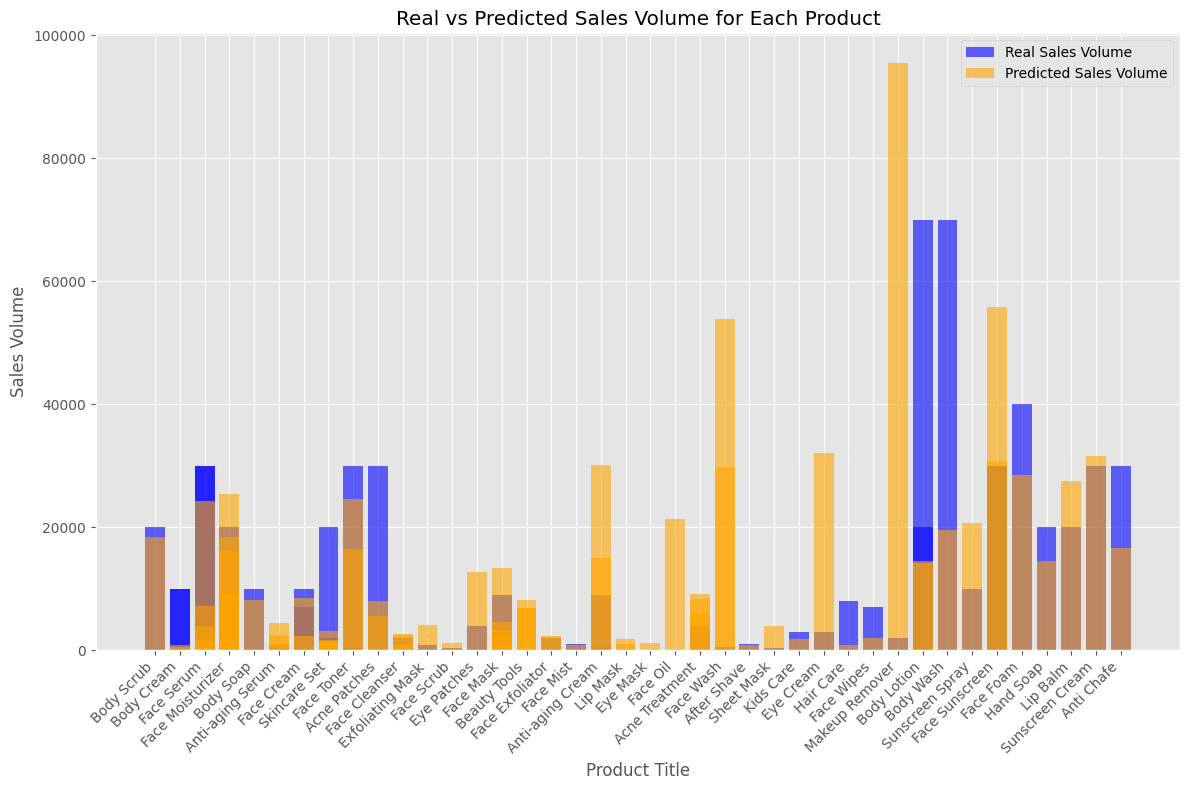

In [ ]:
import matplotlib.pyplot as plt

# Set the style of the plot
plt.style.use('ggplot')

# Plotting real and predicted sales volume for each product
plt.figure(figsize=(12, 8))
plt.bar(small_part['product_type'], small_part['sales_volume_in_past_month'], color='blue', alpha=0.6, label='Real Sales Volume')
plt.bar(small_part['product_type'], small_part['predicted_sales_volume'], color='orange', alpha=0.6, label='Predicted Sales Volume')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Title')
plt.ylabel('Sales Volume')
plt.title('Real vs Predicted Sales Volume for Each Product')
plt.legend()
plt.tight_layout()
plt.show()

The DataFrame above shows the calculated difference and percentage difference for each special_item_form. Here's how you interpret it:

sales_volume_in_past_month: The average sales volume for each special_item_form.
predicted_sales_volume: The average predicted sales volume for each special_item_form.
sales_volume_difference: The difference between the average real sales volume and the average predicted sales volume for each special_item_form.
sales_volume_difference_percent: The percentage difference between the average real sales volume and the average predicted sales volume for each special_item_form.
For example:

For "body cream", the predicted sales volume is higher than the actual sales volume, resulting in a negative difference and percentage difference.
For "face patches", the predicted sales volume is lower than the actual sales volume, resulting in a positive difference and percentage difference.

<ipython-input-25-fd0050c26ce0>:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


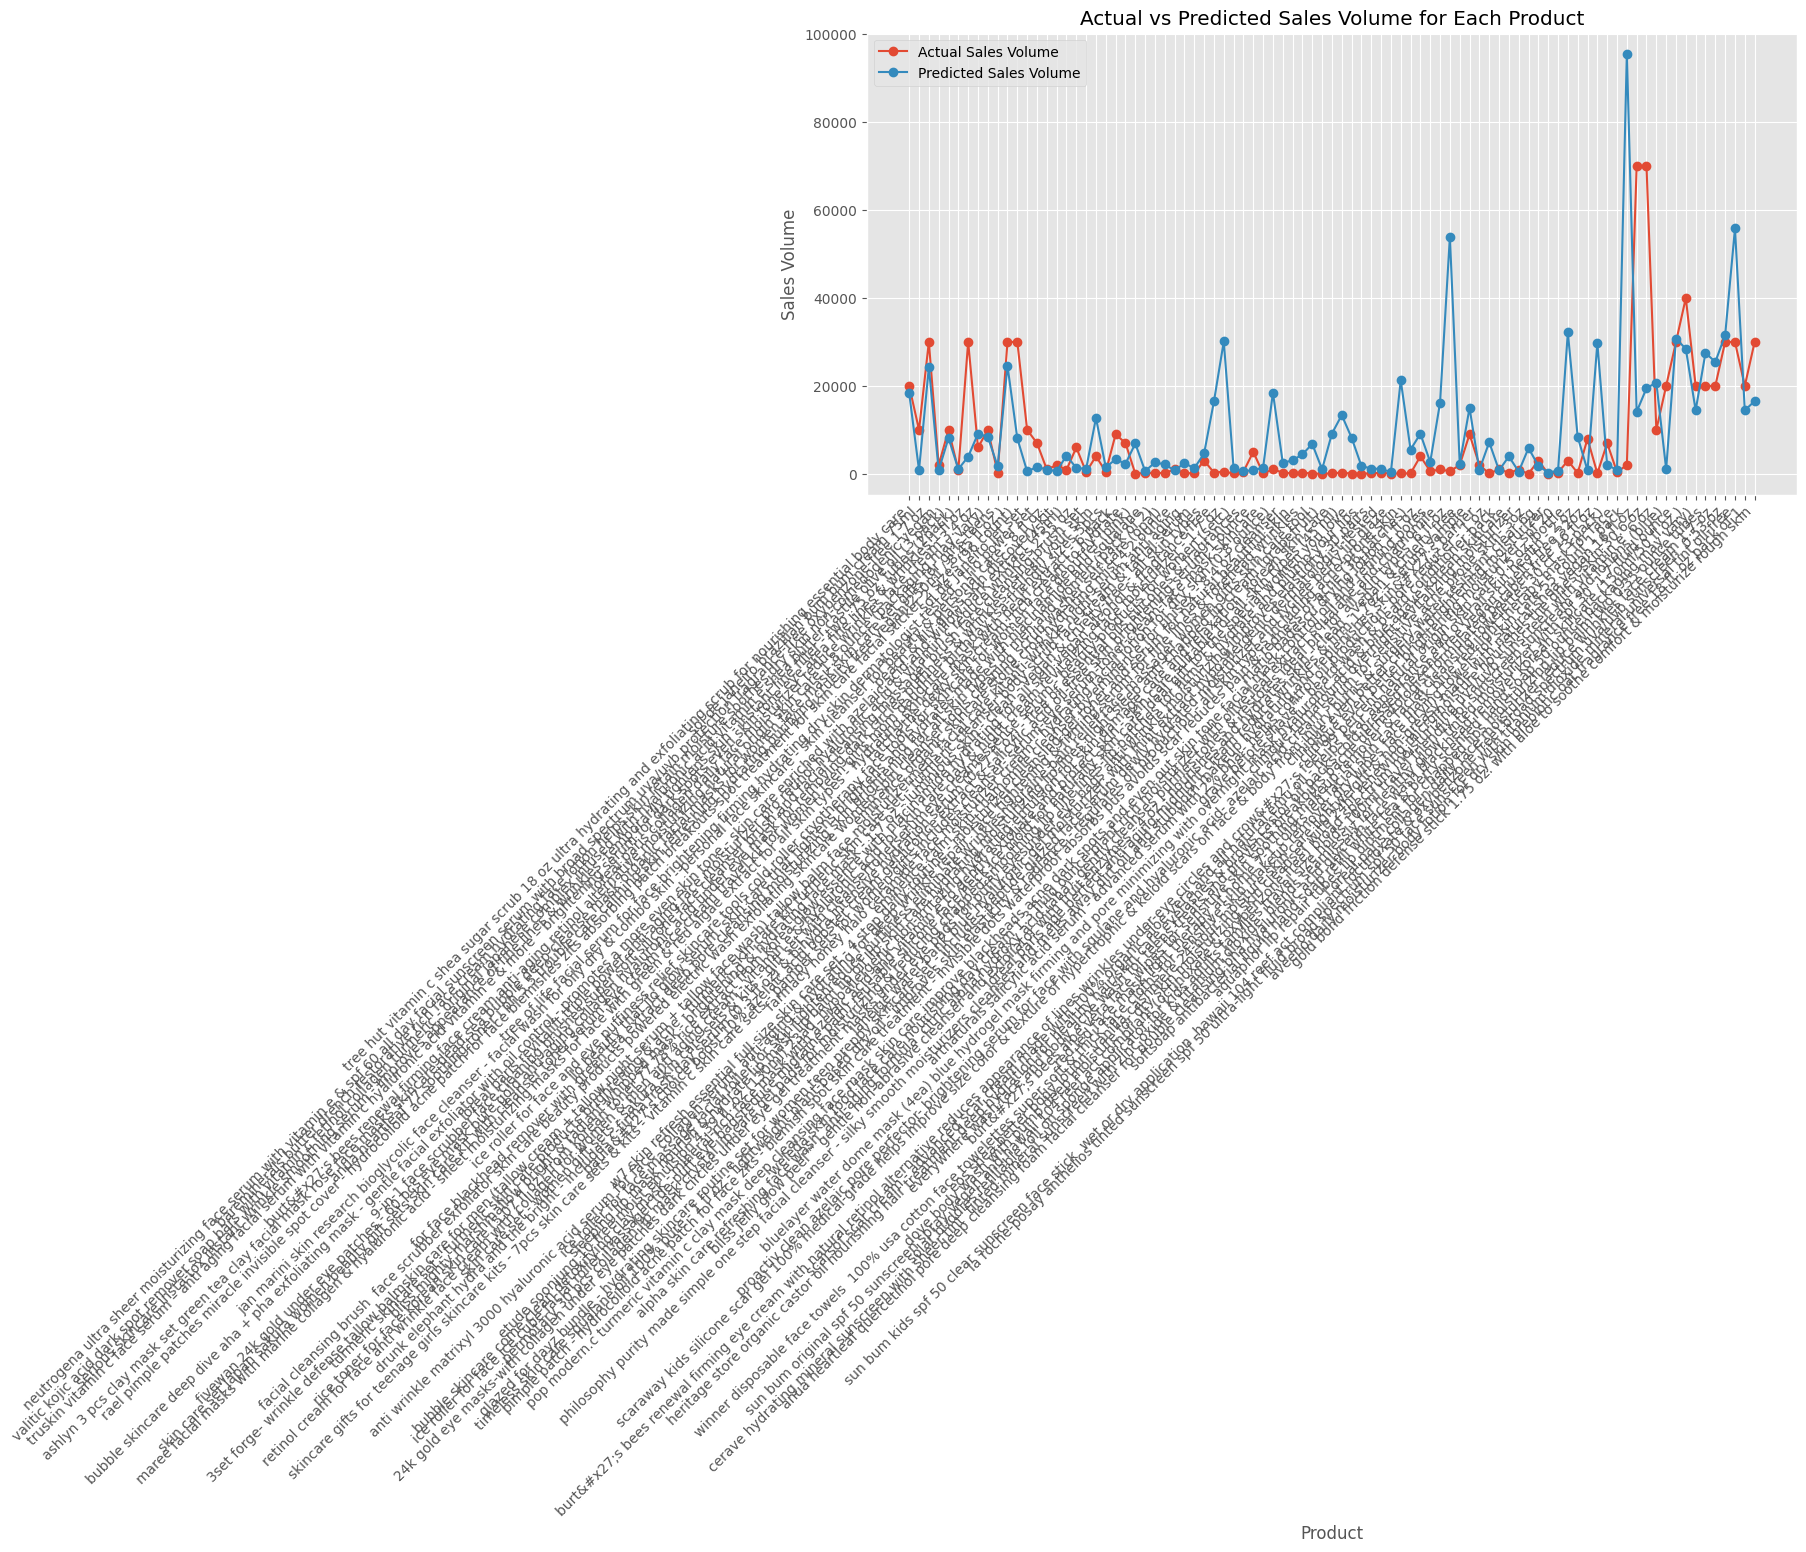

In [ ]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot the actual sales volume
plt.plot(small_part['product_title'], small_part['sales_volume_in_past_month'], marker='o', label='Actual Sales Volume')

# Plot the predicted sales volume
plt.plot(small_part['product_title'], small_part['predicted_sales_volume'], marker='o', label='Predicted Sales Volume')

# Add labels and title
plt.xlabel('Product')
plt.ylabel('Sales Volume')
plt.title('Actual vs Predicted Sales Volume for Each Product')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.1305340012885705



  score of 0.13, it means that approximately 13% of the variance in the sales volume can be explained by the features in your model. This value indicates that your model captures some of the variability in the data but may not be fully capturing all the underlying patterns. It's essential to consider other metrics and possibly explore different models or feature engineering techniques to improve predictive performance.